In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# import data


In [2]:
cust_demo = pd.read_excel(r"C:\Users\Pranav\Downloads\11. Capstone Case Study - Predict Cred Card Consumption\CustomerDemographics.xlsx")
cust_behavior = pd.read_excel(r"C:\Users\Pranav\Downloads\11. Capstone Case Study - Predict Cred Card Consumption\CustomerBehaviorData.xlsx")
cred_cons = pd.read_excel(r"C:\Users\Pranav\Downloads\11. Capstone Case Study - Predict Cred Card Consumption\CreditConsumptionData.xlsx")

In [3]:
cust_demo.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction'],
      dtype='object')

In [4]:
cust_behavior.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

# Data Audit 

In [5]:
#merging tables
df = cust_demo.merge(cust_behavior,right_on='ID',left_on='ID',how = 'left')



In [6]:
df.shape

(20000, 48)

In [7]:
#checking the column null values
(df.isna().mean()*100).sort_values(ascending=False)

Avg_days_between_transaction    0.015
loan_enq                        0.010
investment_3                    0.010
account_type                    0.005
cc_count_apr                    0.005
dc_cons_jun                     0.005
cc_cons_may                     0.005
debit_count_apr                 0.005
emi_active                      0.005
region_code                     0.005
personal_loan_closed            0.005
Income                          0.005
gender                          0.005
debit_amount_may                0.000
credit_amount_apr               0.000
credit_count_apr                0.000
debit_amount_apr                0.000
max_credit_amount_apr           0.000
debit_count_may                 0.000
credit_amount_may               0.000
credit_count_may                0.000
max_credit_amount_may           0.000
debit_amount_jun                0.000
credit_amount_jun               0.000
credit_count_jun                0.000
debit_count_jun                 0.000
max_credit_a

In [8]:
#checking if the values more than 80%  are null 
df = df.dropna(axis=0,thresh=df.shape[1]// (10/8))
df

ID account_type gender  age  Income  Emp_Tenure_Years  \
0      19427      current      M   63  MEDIUM              30.1   
1      16150      current      M   36  MEDIUM              14.4   
2      11749      current      F   28  MEDIUM               4.8   
3      11635      current      M   32  MEDIUM               9.6   
4       8908      current      M   32    HIGH              12.0   
...      ...          ...    ...  ...     ...               ...   
19995   1270      current      F   66  MEDIUM              32.2   
19996  15992      current      M   53  MEDIUM              19.8   
19997   7081      current      F   66  MEDIUM              18.4   
19998   6821      current      M   32     LOW               6.0   
19999  13730      current      F  118     LOW              78.4   

       Tenure_with_Bank  region_code  NetBanking_Flag  \
0                    10        628.0                1   
1                    10        656.0                0   
2                    10        314.0                1   
3                     2        614.0                1   
4                     7        750.0                1   
...                 ...          ...              ...   
19995                 6        354.0                1   
19996                 5        809.0                0   
19997                 1        466.0                0   
19998                 8        619.0                0   
19999                 7        882.0                1   

       Avg_days_between_transaction  ...  credit_count_may  debit_count_may  \
0                               5.0  ...                 5               14   
1                              12.0  ...                 4               63   
2                              13.0  ...                 6               82   
3                              19.0  ...                 2               78   
4                              18.0  ...                 3              171   
...                             ...  ...               ...              ...   
19995                           7.0  ...                 0                8   
19996                          14.0  ...                47               11   
19997                          10.0  ...                 2              171   
19998                          17.0  ...                 3               82   
19999                          10.0  ...                 5                8   

       max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                    20770.0          44884.90          369000.75   
1                    78627.0          91073.84          243182.32   
2                     1260.0          96552.00           35467.00   
3                    23332.0          18250.00           87204.35   
4                    41672.0          83525.75           83992.00   
...                      ...               ...                ...   
19995                24438.0         153772.21           31284.00   
19996               213000.0          18098.47           93108.00   
19997                34327.0          32198.63           46800.00   
19998                51929.0          27334.14           20201.00   
19999                32431.0          23464.59           38503.00   

       credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                    40               96                46088.0         Y   
1                     7               12                17953.0         Y   
2                    16               42                41121.0         Y   
3                     2               10                32003.0         Y   
4                    21               12                 9626.0         Y   
...                 ...              ...                    ...       ...   
19995                 3               38                42872.0         Y   
19996                43               11                36747.0         Y   
19997                 3               38         

In [9]:
#dropping null values
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19988 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            19988 non-null  int64  
 1   account_type                  19988 non-null  object 
 2   gender                        19988 non-null  object 
 3   age                           19988 non-null  int64  
 4   Income                        19988 non-null  object 
 5   Emp_Tenure_Years              19988 non-null  float64
 6   Tenure_with_Bank              19988 non-null  int64  
 7   region_code                   19988 non-null  float64
 8   NetBanking_Flag               19988 non-null  int64  
 9   Avg_days_between_transaction  19988 non-null  float64
 10  cc_cons_apr                   19988 non-null  float64
 11  dc_cons_apr                   19988 non-null  float64
 12  cc_cons_may                   19988 non-null  float64
 13  d

In [10]:
#making customer360 data
df = df.merge(cred_cons,left_on='ID',right_on='ID',how = 'inner')


In [11]:
df.isna().sum()

ID                                 0
account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
i

In [12]:
#separating the dataset for building the model and prediction
model_build_data = df[df['cc_cons'].notna()]
predict_data =  df[df['cc_cons'].isna()]
model_build_data

ID account_type gender  age  Income  Emp_Tenure_Years  \
104    12554      current      M   35  MEDIUM              15.0   
105    17645      current      M   35    HIGH              15.0   
106     7604      current      M   55  MEDIUM              24.5   
107     1590      current      F   29  MEDIUM               4.5   
108    19106      current      M   27  MEDIUM               4.9   
...      ...          ...    ...  ...     ...               ...   
15094   6995      current      F   53     LOW              13.2   
15095  10376      current      M   44  MEDIUM               2.4   
15096   2181      current      M   37  MEDIUM               3.4   
15097  18417      current      M  220  MEDIUM              40.0   
15098   4547      current      M   66  MEDIUM               4.6   

       Tenure_with_Bank  region_code  NetBanking_Flag  \
104                   1        708.0                0   
105                   6        123.0                0   
106                   1        802.0                1   
107                   6        867.0                1   
108                   3        958.0                1   
...                 ...          ...              ...   
15094                 9        653.0                1   
15095                 9        535.0                1   
15096                 9        464.0                1   
15097                10        536.0                1   
15098                 2        269.0                0   

       Avg_days_between_transaction  ...  debit_count_may  \
104                            17.0  ...               40   
105                            14.0  ...               78   
106                             3.0  ...               82   
107                             4.0  ...               38   
108                            11.0  ...                2   
...                             ...  ...              ...   
15094                          20.0  ...                8   
15095                           2.0  ...               20   
15096                           8.0  ...                5   
15097                           3.0  ...               25   
15098                           8.0  ...               82   

       max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
104                  24563.0          30051.32           12761.00   
105                  23948.0          42119.05           76206.00   
106                  10752.0          58373.25           75283.00   
107                  12607.0          69851.51           68708.00   
108                  21440.0          52292.68          199925.50   
...                      ...               ...                ...   
15094                 6936.0         487751.19           42625.50   
15095               202639.0           8666.01           34987.55   
15096                44421.0          97896.48          261432.00   
15097                22409.0          22693.92           33025.29   
15098                 8084.0          41328.96           78574.00   

       credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
104                   2               65               50836.00         Y   
105                  21               63               23226.00         Y   
106                   7                1               27036.00         Y   
107                  21               83               43037.00         Y   
108                   2               35               17284.00         Y   
...                 ...              ...                    ...       ...   
15094                14                8               82851.00         Y   
15095                11               18              118110.47         Y   
15096                 4               73               49545.00         Y   
15097                 3               80               16130.00         Y   
15098                47               50               22849.00         Y   

       emi_active   cc_cons  
104

In [13]:
#model_build_data splitting into features and target
x = model_build_data.drop('cc_cons',axis = 1)
y = model_build_data['cc_cons']

C:\Users\Pranav\Downloads\anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

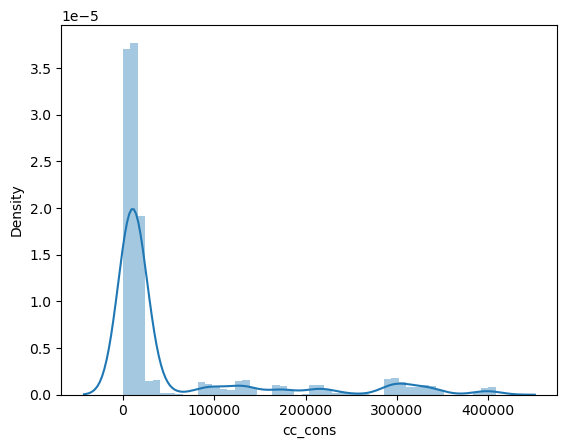

In [14]:
sns.distplot(model_build_data.cc_cons)

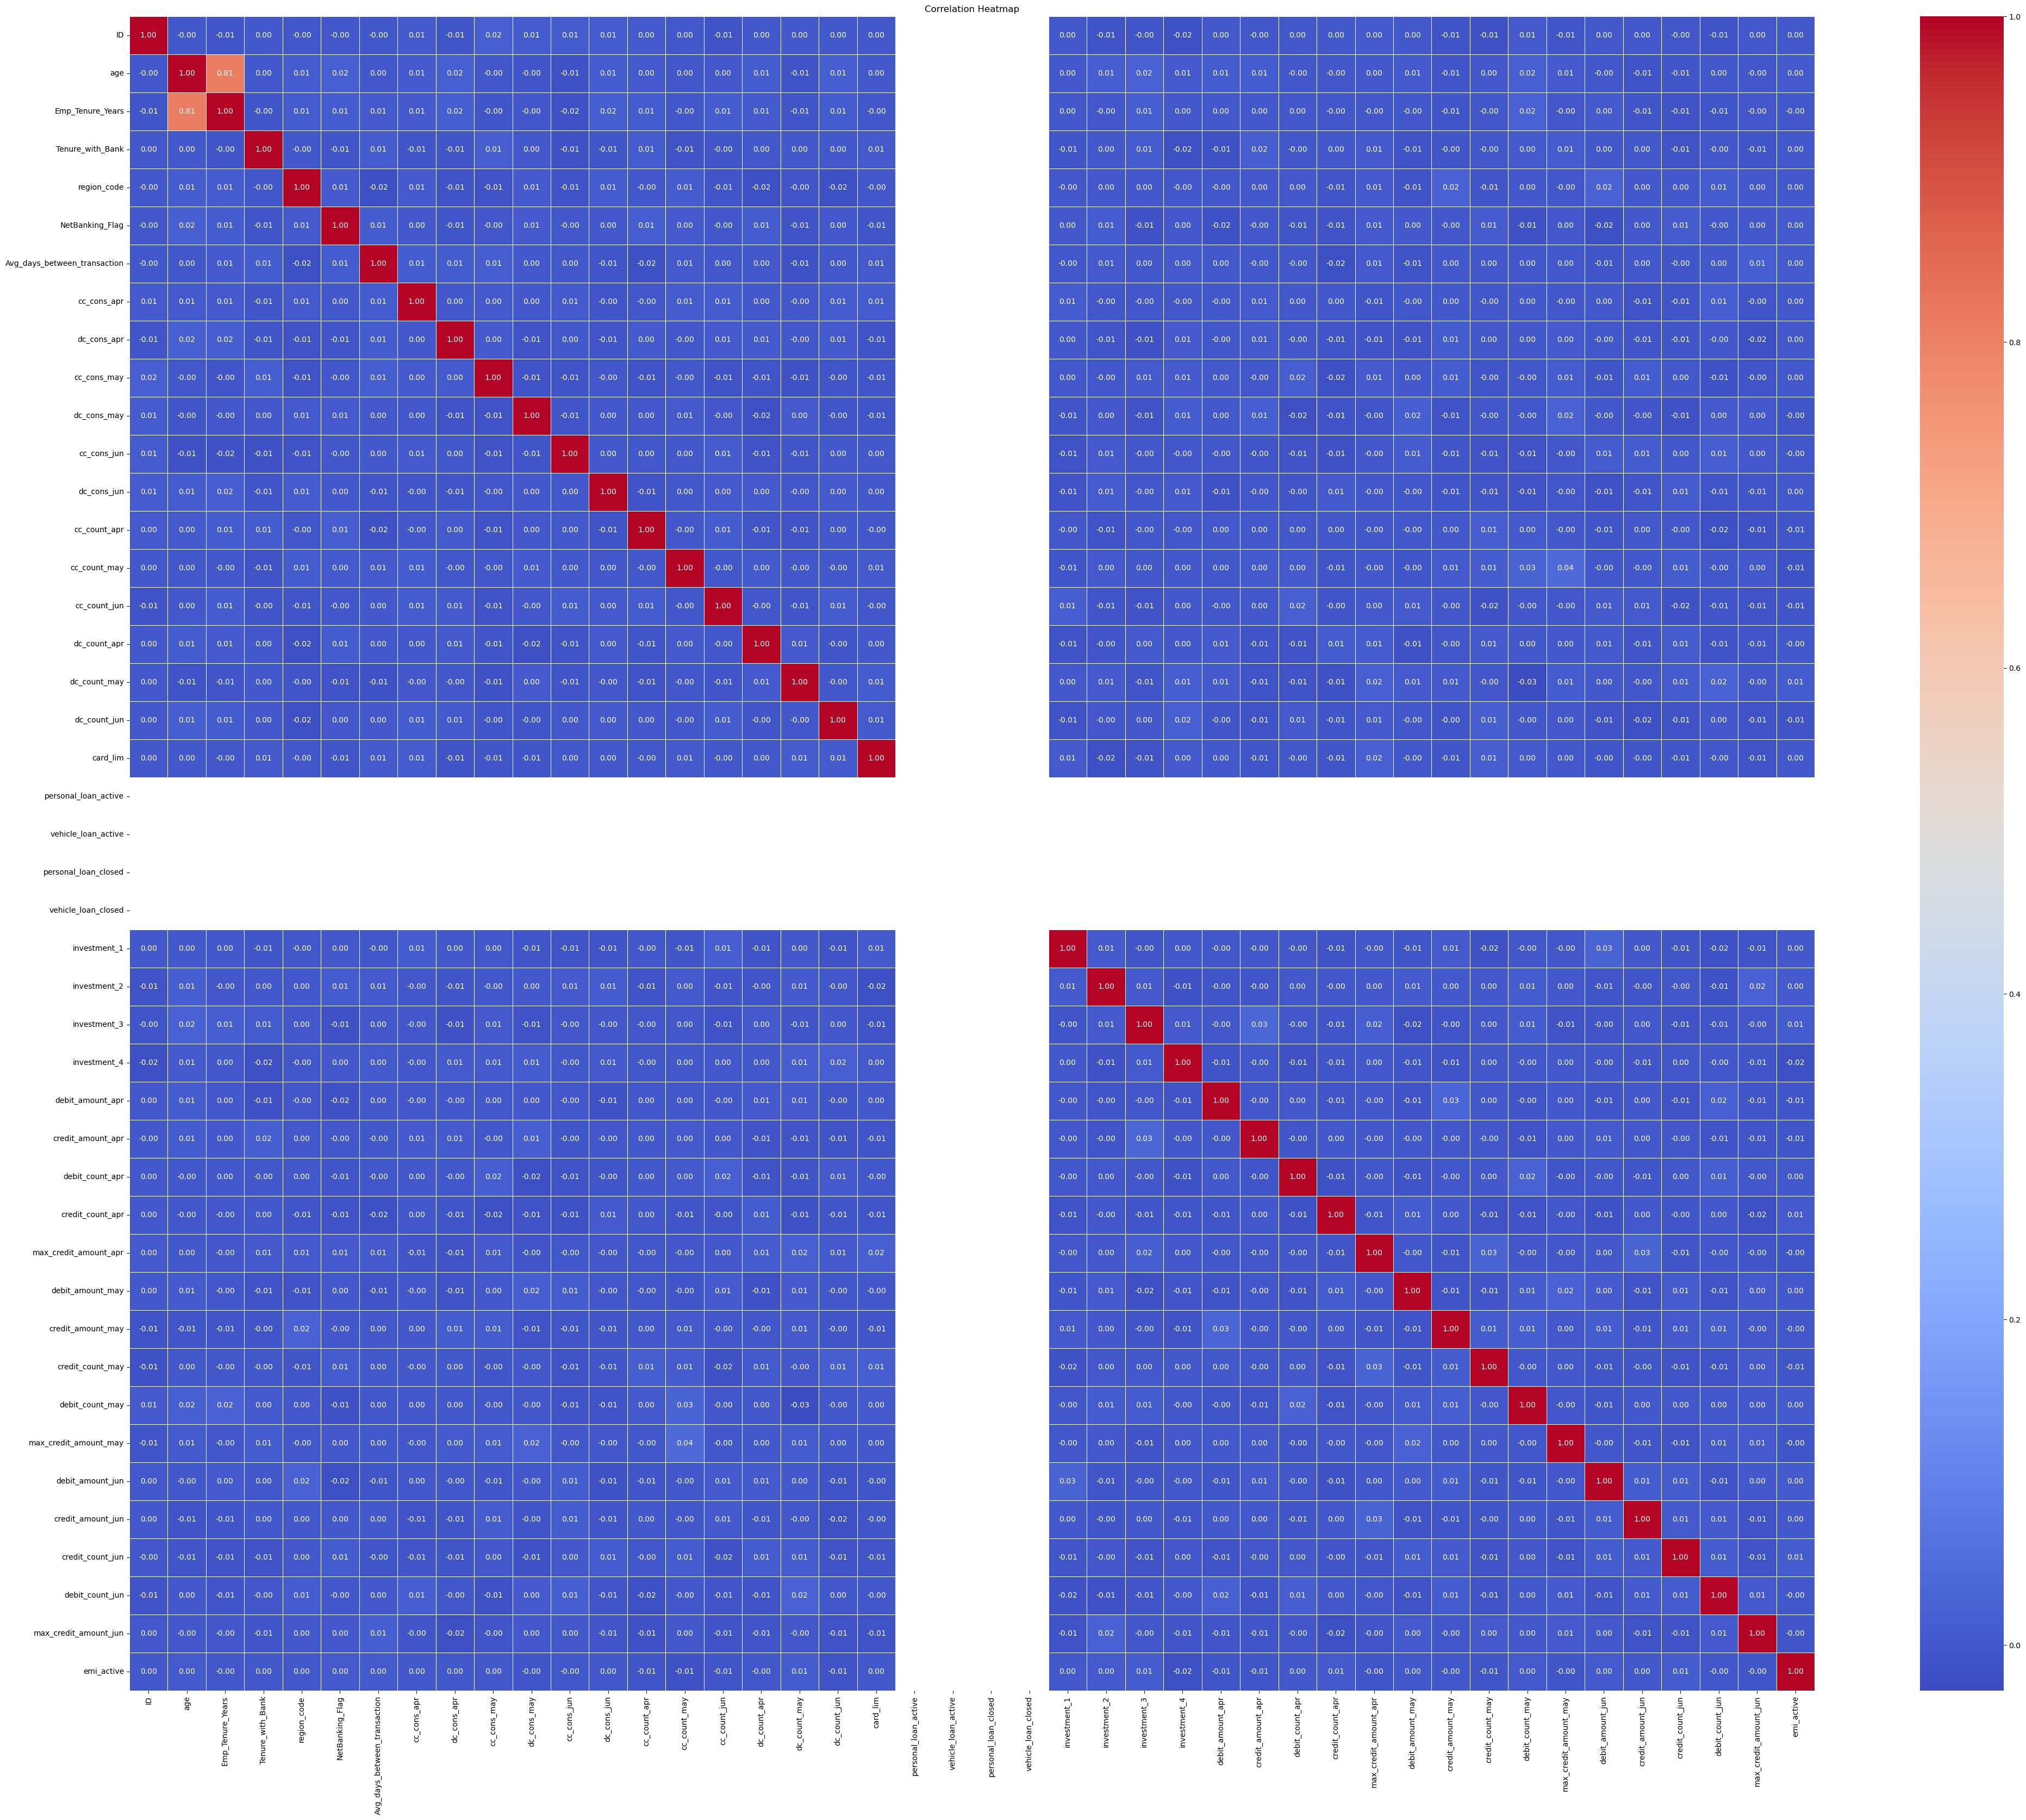

In [15]:
#heatmap
plt.figure(figsize=(50, 40))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

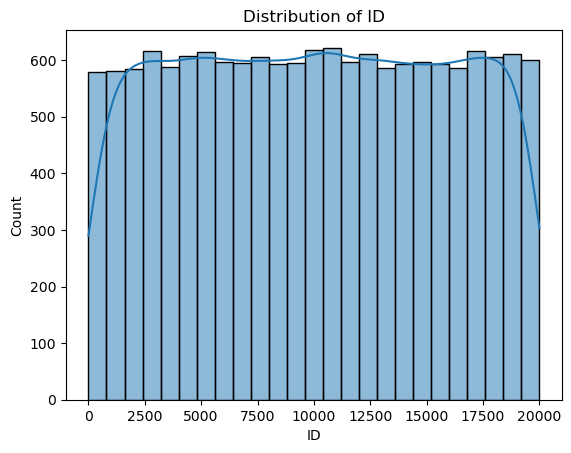

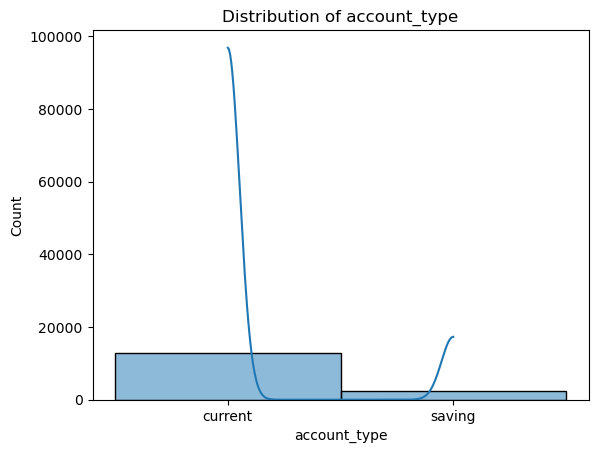

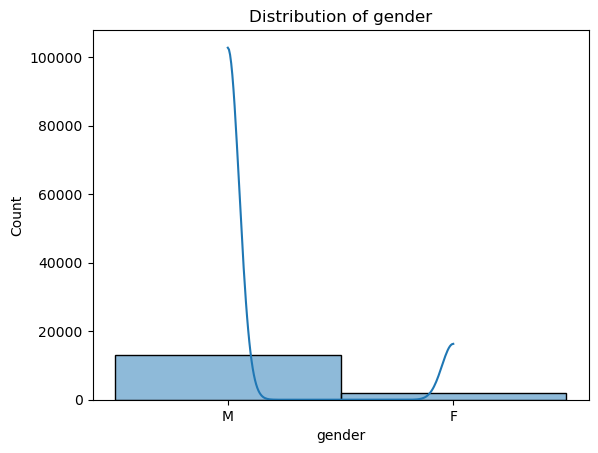

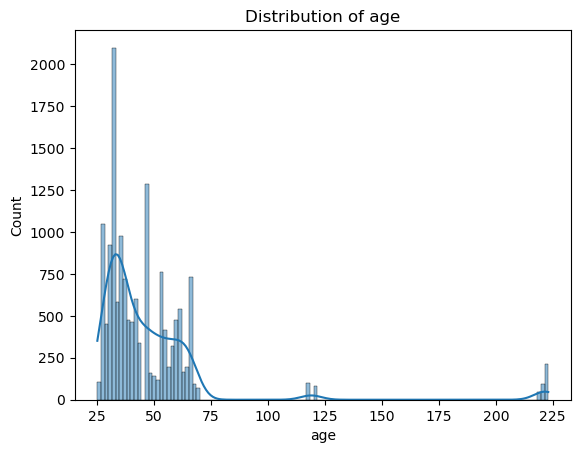

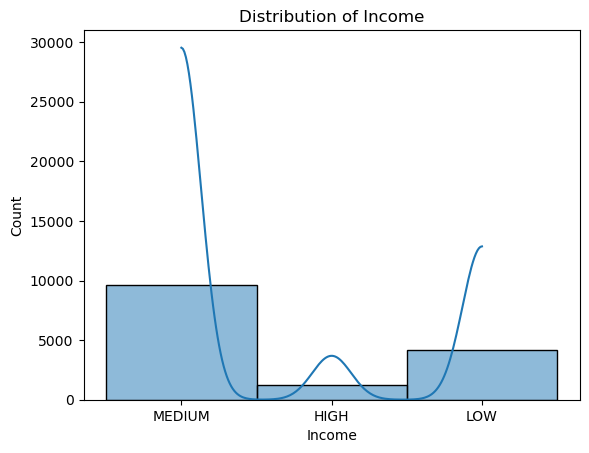

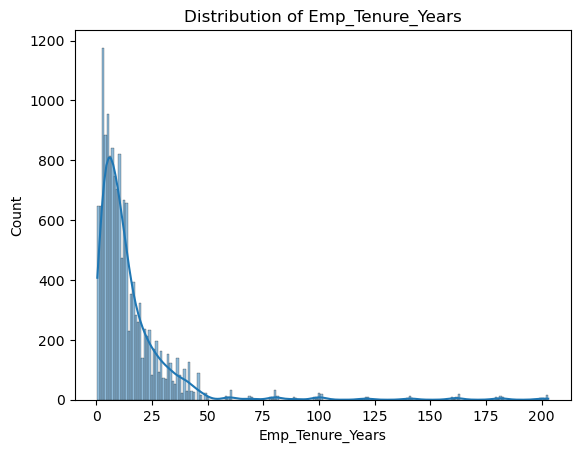

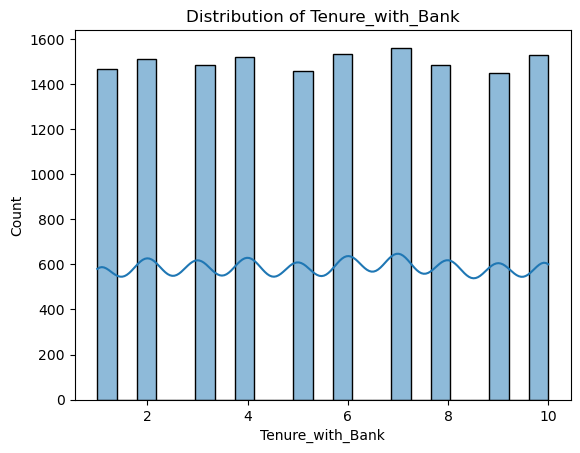

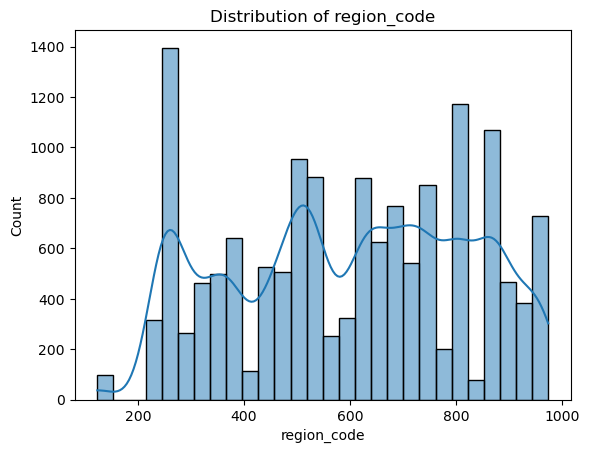

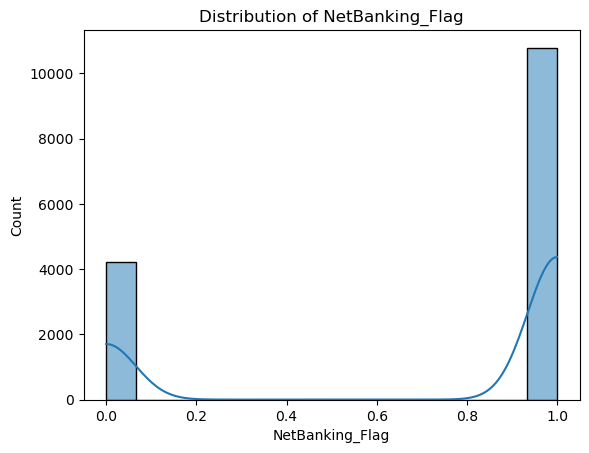

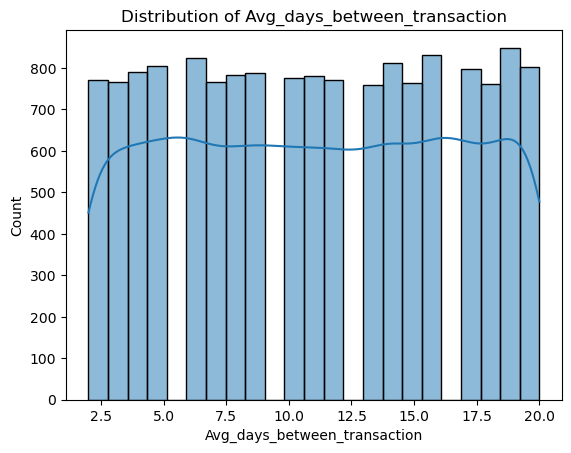

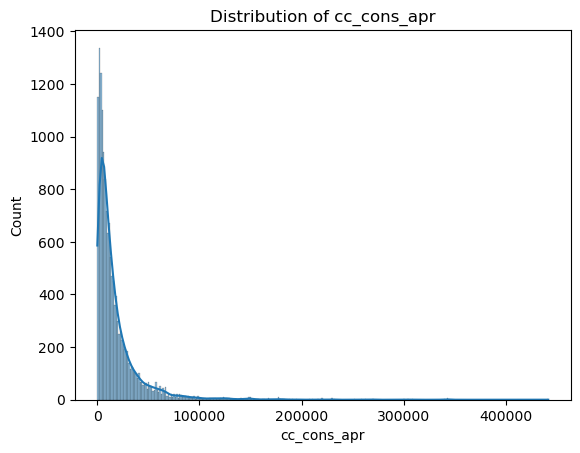

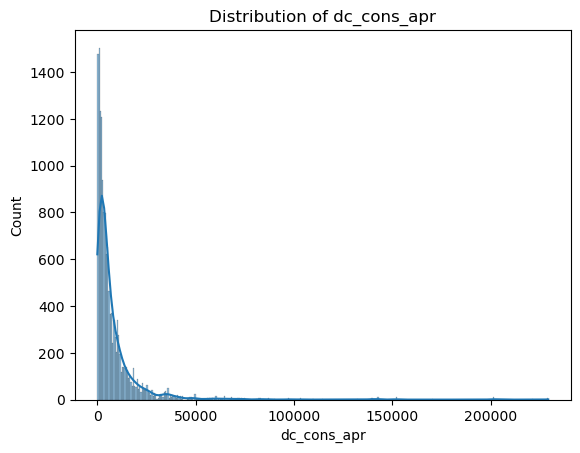

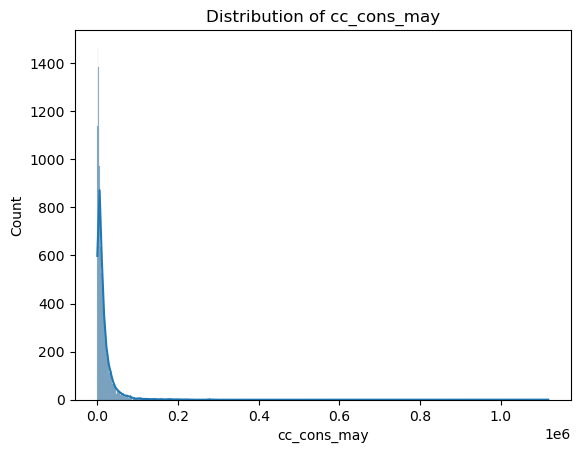

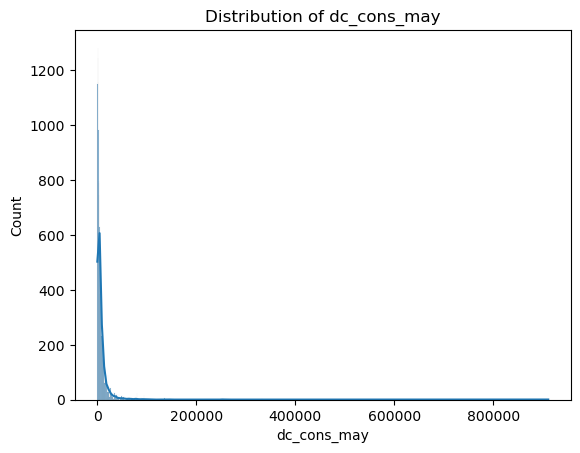

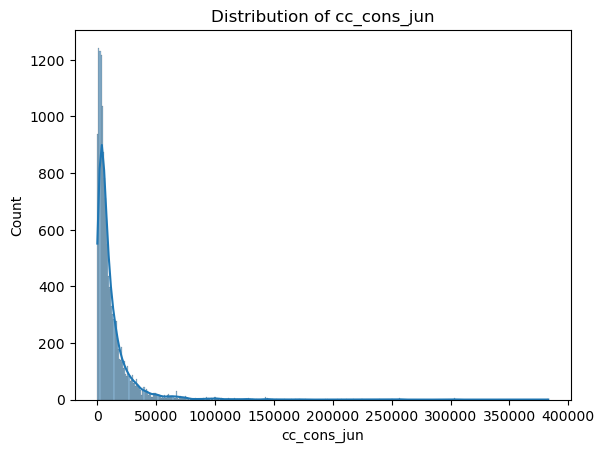

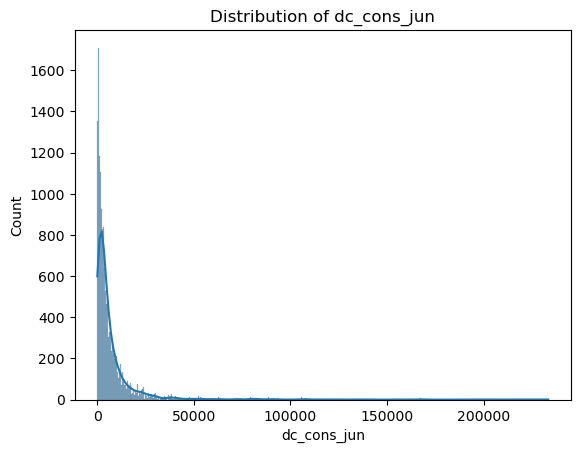

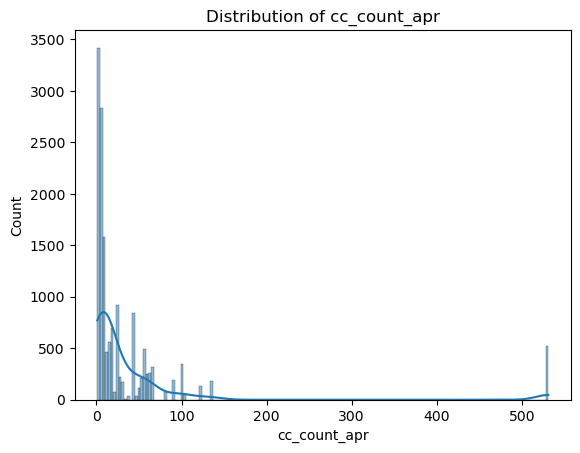

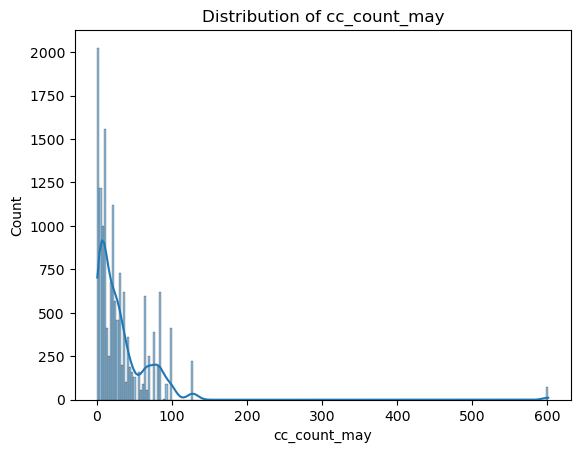

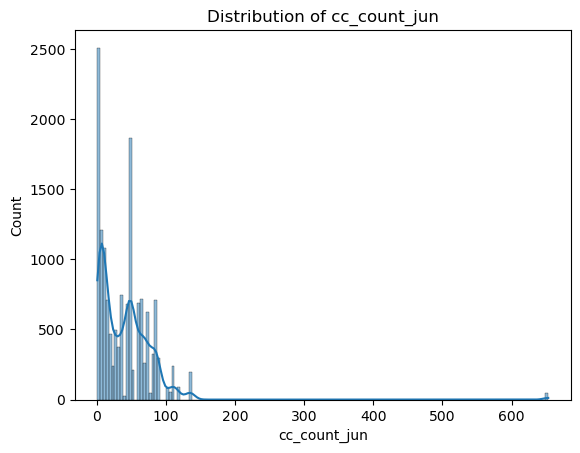

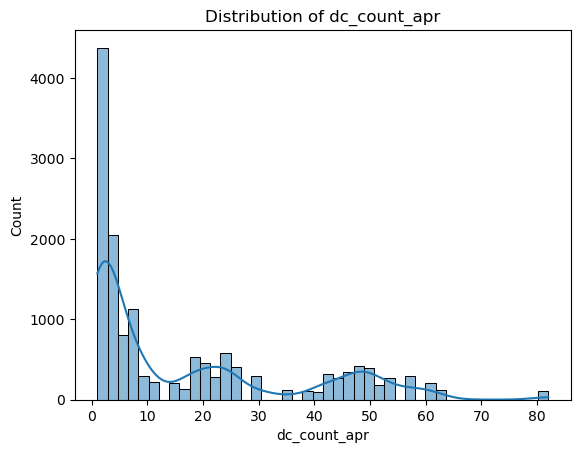

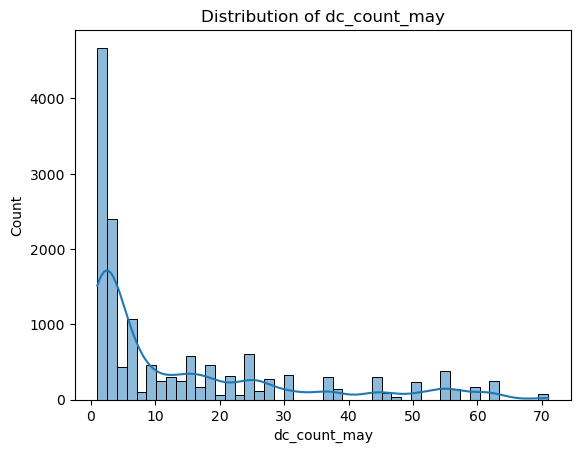

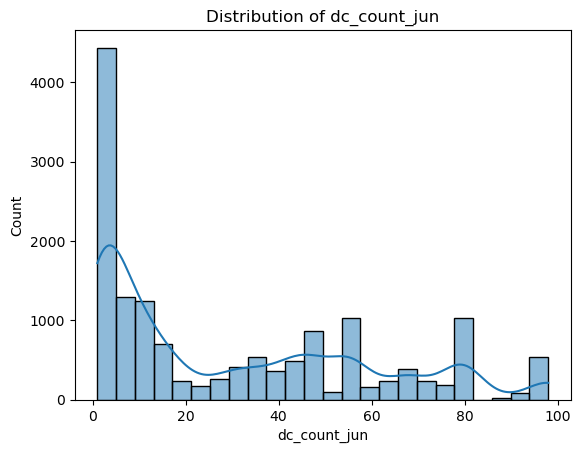

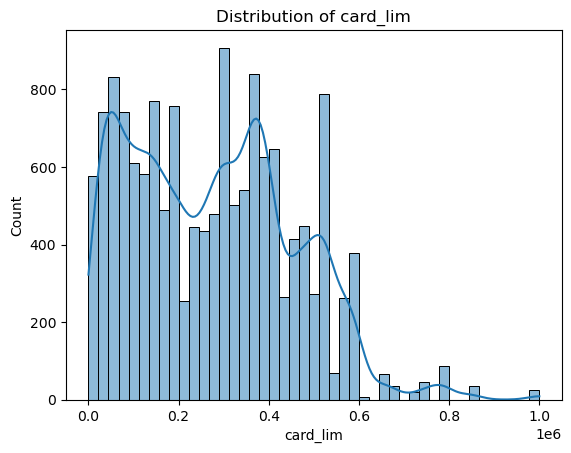

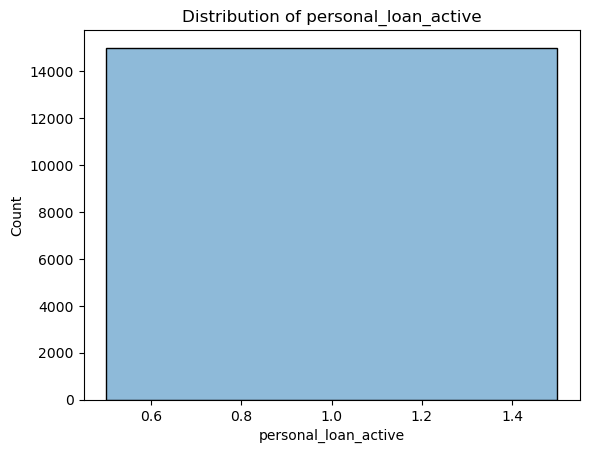

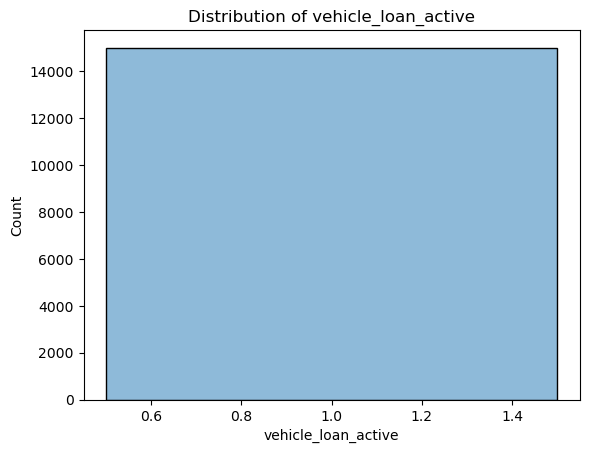

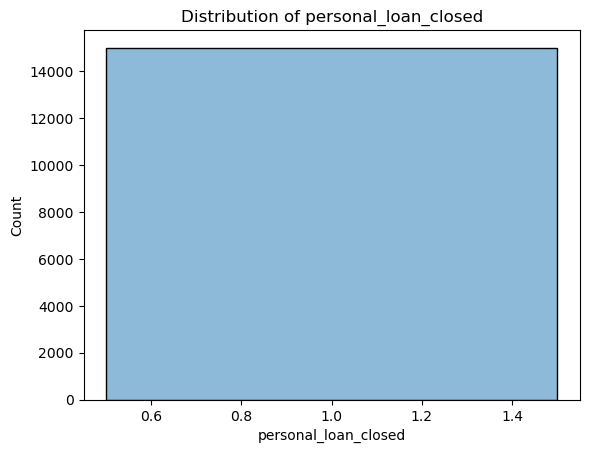

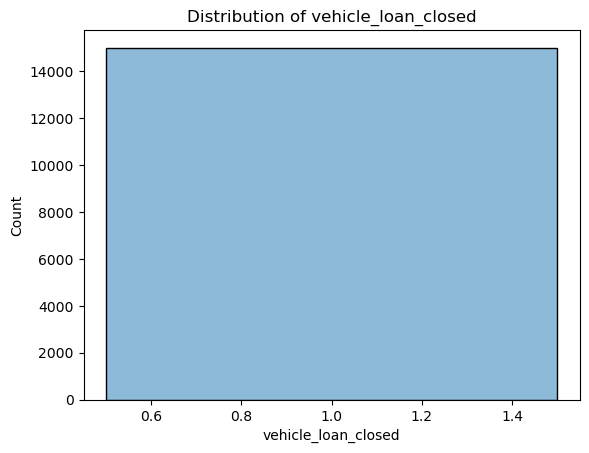

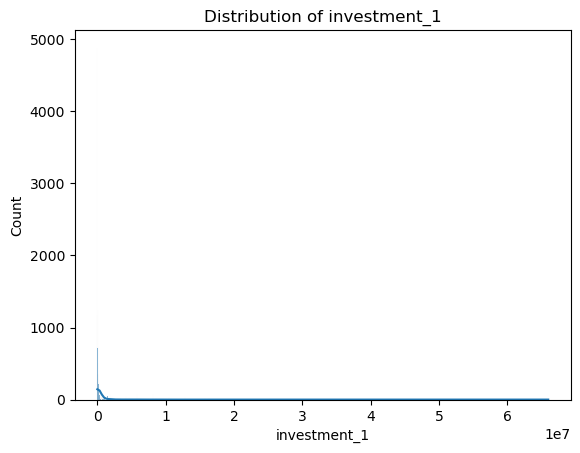

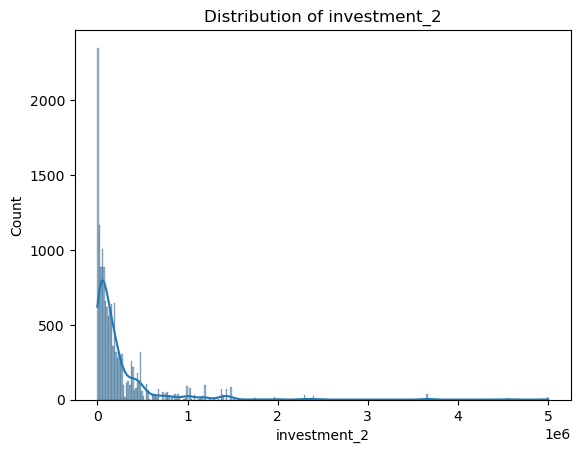

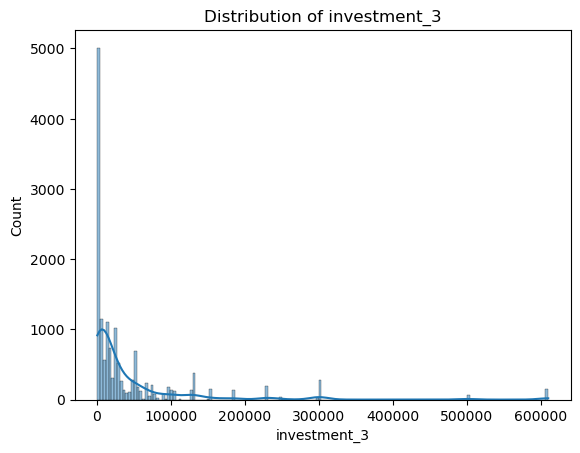

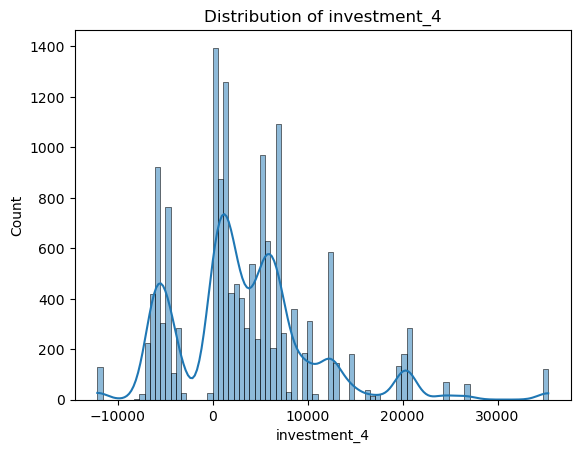

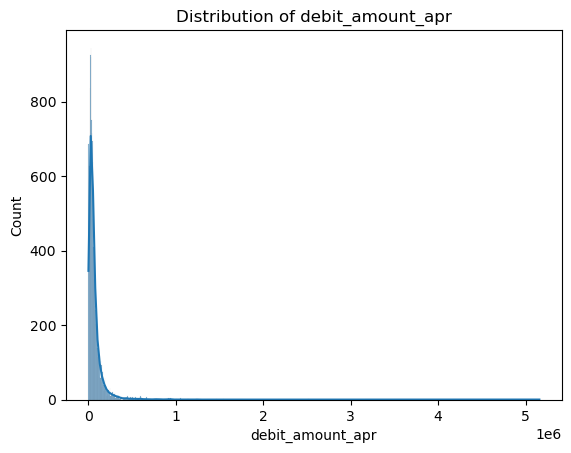

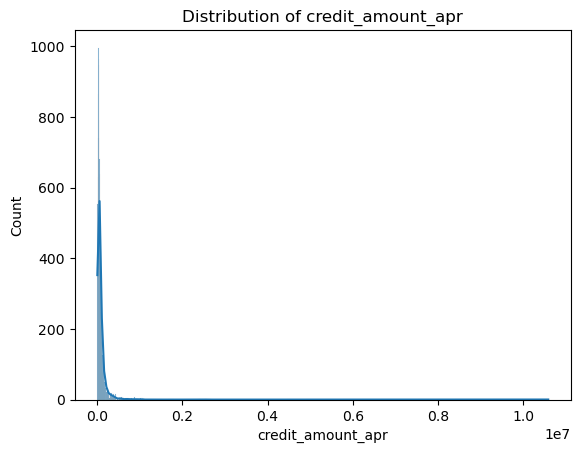

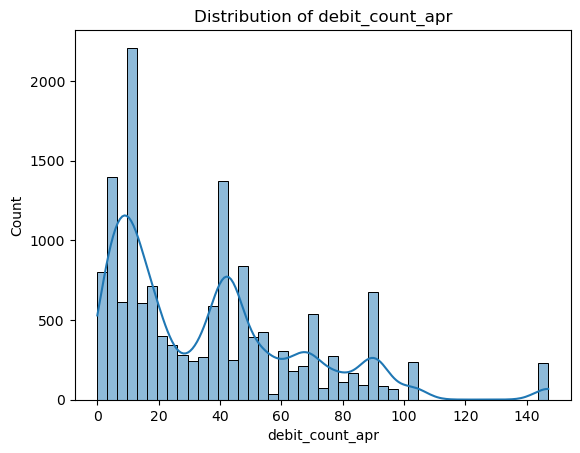

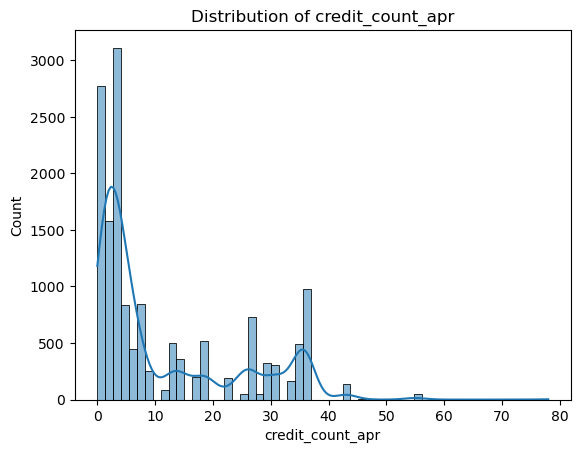

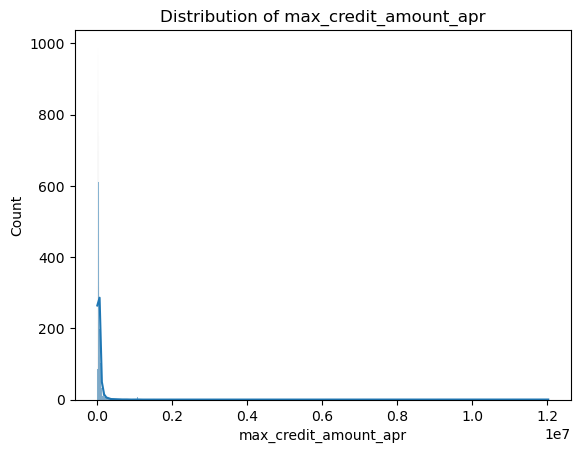

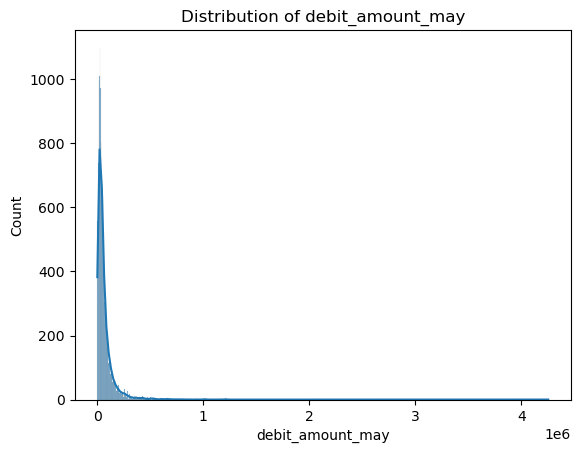

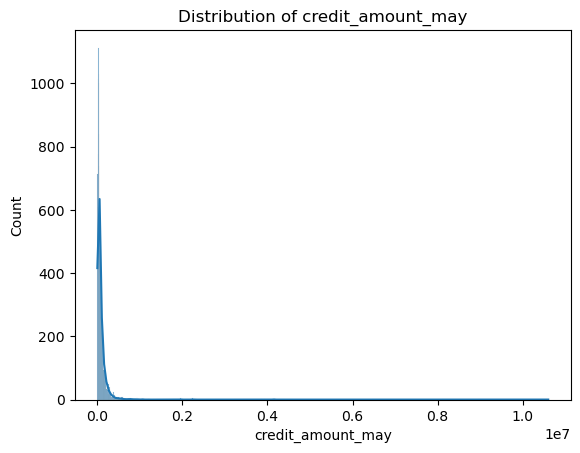

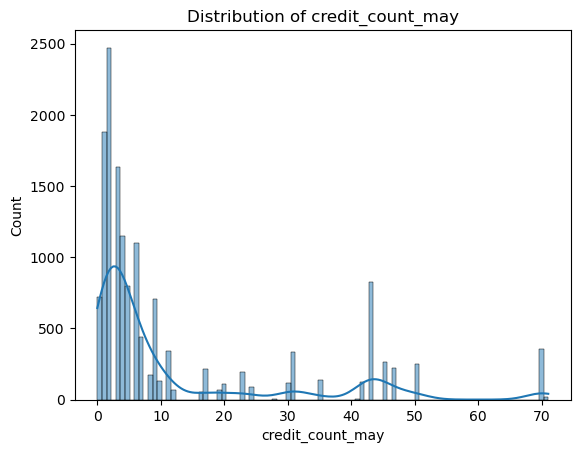

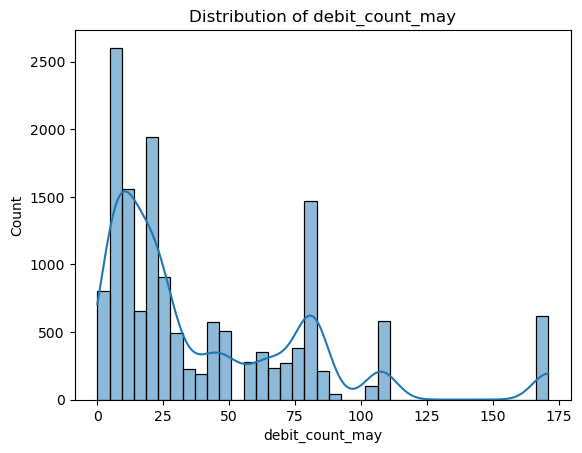

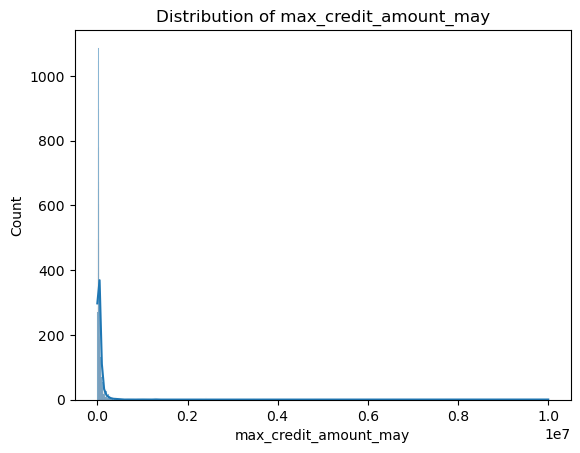

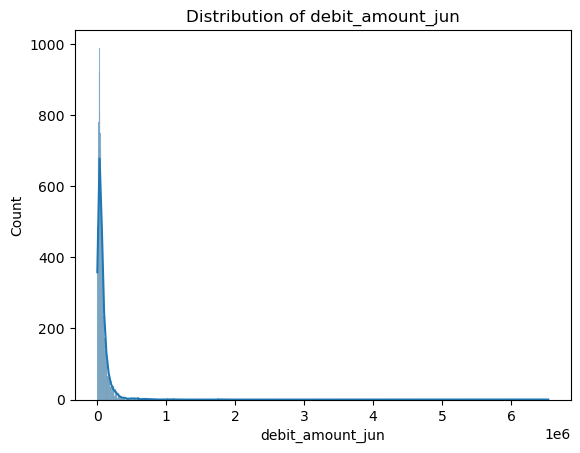

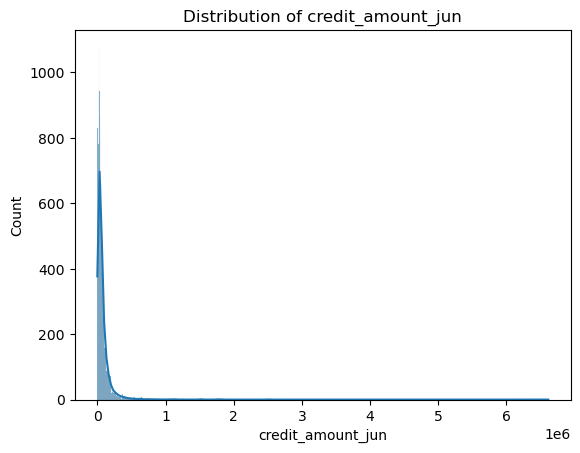

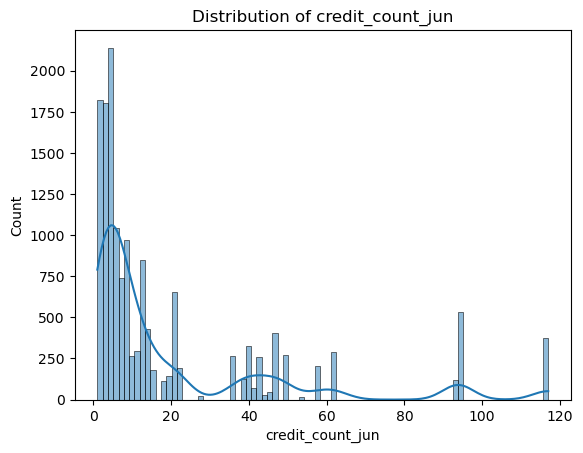

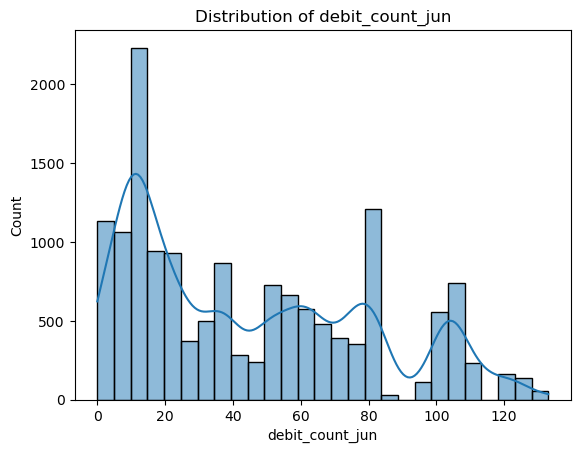

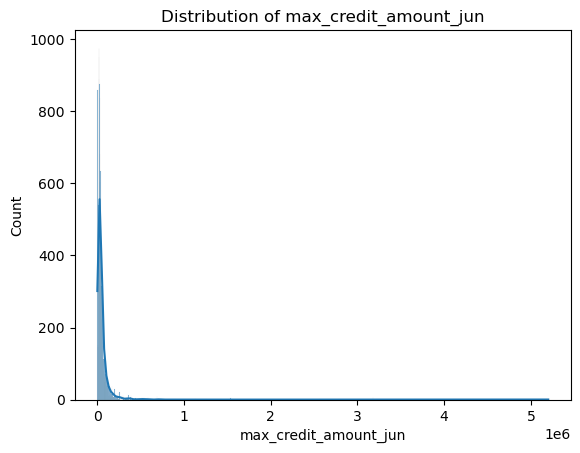

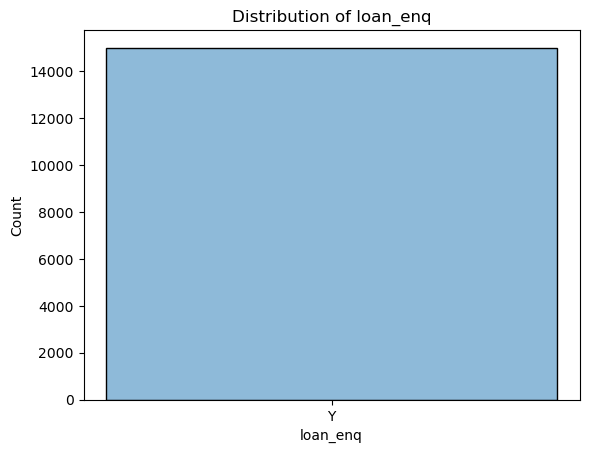

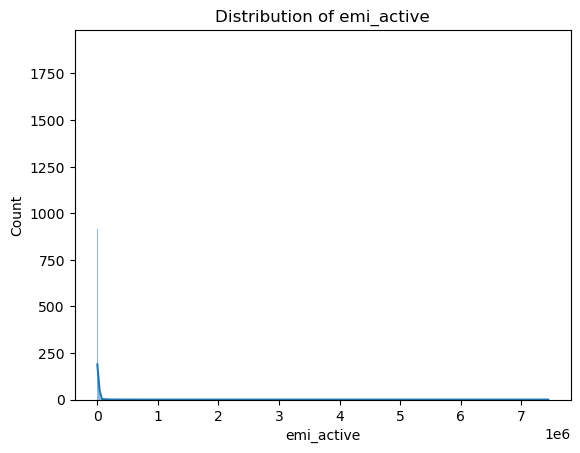

In [16]:
##distplot for each column
for column in x.columns:
    sns.histplot(x[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

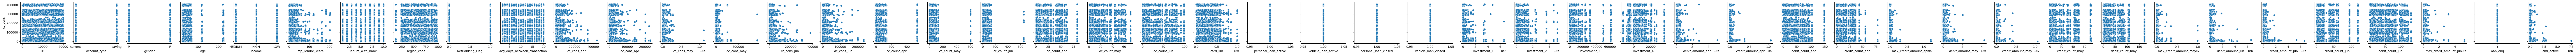

In [17]:
#pairplot
sns.pairplot(model_build_data,x_vars=['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active'],y_vars='cc_cons',)
plt.show()

In [18]:
#one-hot encoding
x = pd.get_dummies(x,columns=['gender','account_type','loan_enq'],drop_first=True)

In [19]:
#ordinal encoding
income_order = ['LOW','MEDIUM','HIGH']
encoder = OrdinalEncoder(categories=[income_order])
x['Income'] = encoder.fit_transform(x[['Income']])

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 104 to 15098
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14995 non-null  int64  
 1   age                           14995 non-null  int64  
 2   Income                        14995 non-null  float64
 3   Emp_Tenure_Years              14995 non-null  float64
 4   Tenure_with_Bank              14995 non-null  int64  
 5   region_code                   14995 non-null  float64
 6   NetBanking_Flag               14995 non-null  int64  
 7   Avg_days_between_transaction  14995 non-null  float64
 8   cc_cons_apr                   14995 non-null  float64
 9   dc_cons_apr                   14995 non-null  float64
 10  cc_cons_may                   14995 non-null  float64
 11  dc_cons_may                   14995 non-null  float64
 12  cc_cons_jun                   14995 non-null  float64
 13 

In [21]:
#dropping highly correlated features
#variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_thersh = VarianceThreshold(threshold=0)
var_thersh.fit(x)
var_thersh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [22]:
drop_columns = [i for i in x.columns
                 if i not in x.columns[var_thersh.get_support()]]
drop_columns
    

['personal_loan_active',
 'vehicle_loan_active',
 'personal_loan_closed',
 'vehicle_loan_closed']

In [23]:
x = x.drop(drop_columns,axis=1)

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 104 to 15098
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14995 non-null  int64  
 1   age                           14995 non-null  int64  
 2   Income                        14995 non-null  float64
 3   Emp_Tenure_Years              14995 non-null  float64
 4   Tenure_with_Bank              14995 non-null  int64  
 5   region_code                   14995 non-null  float64
 6   NetBanking_Flag               14995 non-null  int64  
 7   Avg_days_between_transaction  14995 non-null  float64
 8   cc_cons_apr                   14995 non-null  float64
 9   dc_cons_apr                   14995 non-null  float64
 10  cc_cons_may                   14995 non-null  float64
 11  dc_cons_may                   14995 non-null  float64
 12  cc_cons_jun                   14995 non-null  float64
 13 

In [26]:
#deleting highly correlated features
def correlation(dataset,threshold):
    call_cor = set()
    corr_matrix = model_build_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                call_cor.add(colname)
    return call_cor

In [27]:
corr_features = correlation(x,0.7)
len(set(corr_features))
x = x.drop(corr_features,axis = 1)

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 104 to 15098
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14995 non-null  int64  
 1   age                           14995 non-null  int64  
 2   Income                        14995 non-null  float64
 3   Tenure_with_Bank              14995 non-null  int64  
 4   region_code                   14995 non-null  float64
 5   NetBanking_Flag               14995 non-null  int64  
 6   Avg_days_between_transaction  14995 non-null  float64
 7   cc_cons_apr                   14995 non-null  float64
 8   dc_cons_apr                   14995 non-null  float64
 9   cc_cons_may                   14995 non-null  float64
 10  dc_cons_may                   14995 non-null  float64
 11  cc_cons_jun                   14995 non-null  float64
 12  dc_cons_jun                   14995 non-null  float64
 13 

In [29]:
#dropping the unique features id and region code 
x = x.drop(['ID','region_code'],axis=1)


In [30]:
x['investment_4'].describe()


count    14995.000000
mean      3523.113863
std       7373.802022
min     -12179.000000
25%          0.000000
50%       2351.000000
75%       6885.000000
max      35346.000000
Name: investment_4, dtype: float64

In [31]:
#investment_4 containing negative values.So making the minimum value into 0
x['investment_4'] = x['investment_4'] - x['investment_4'].min()

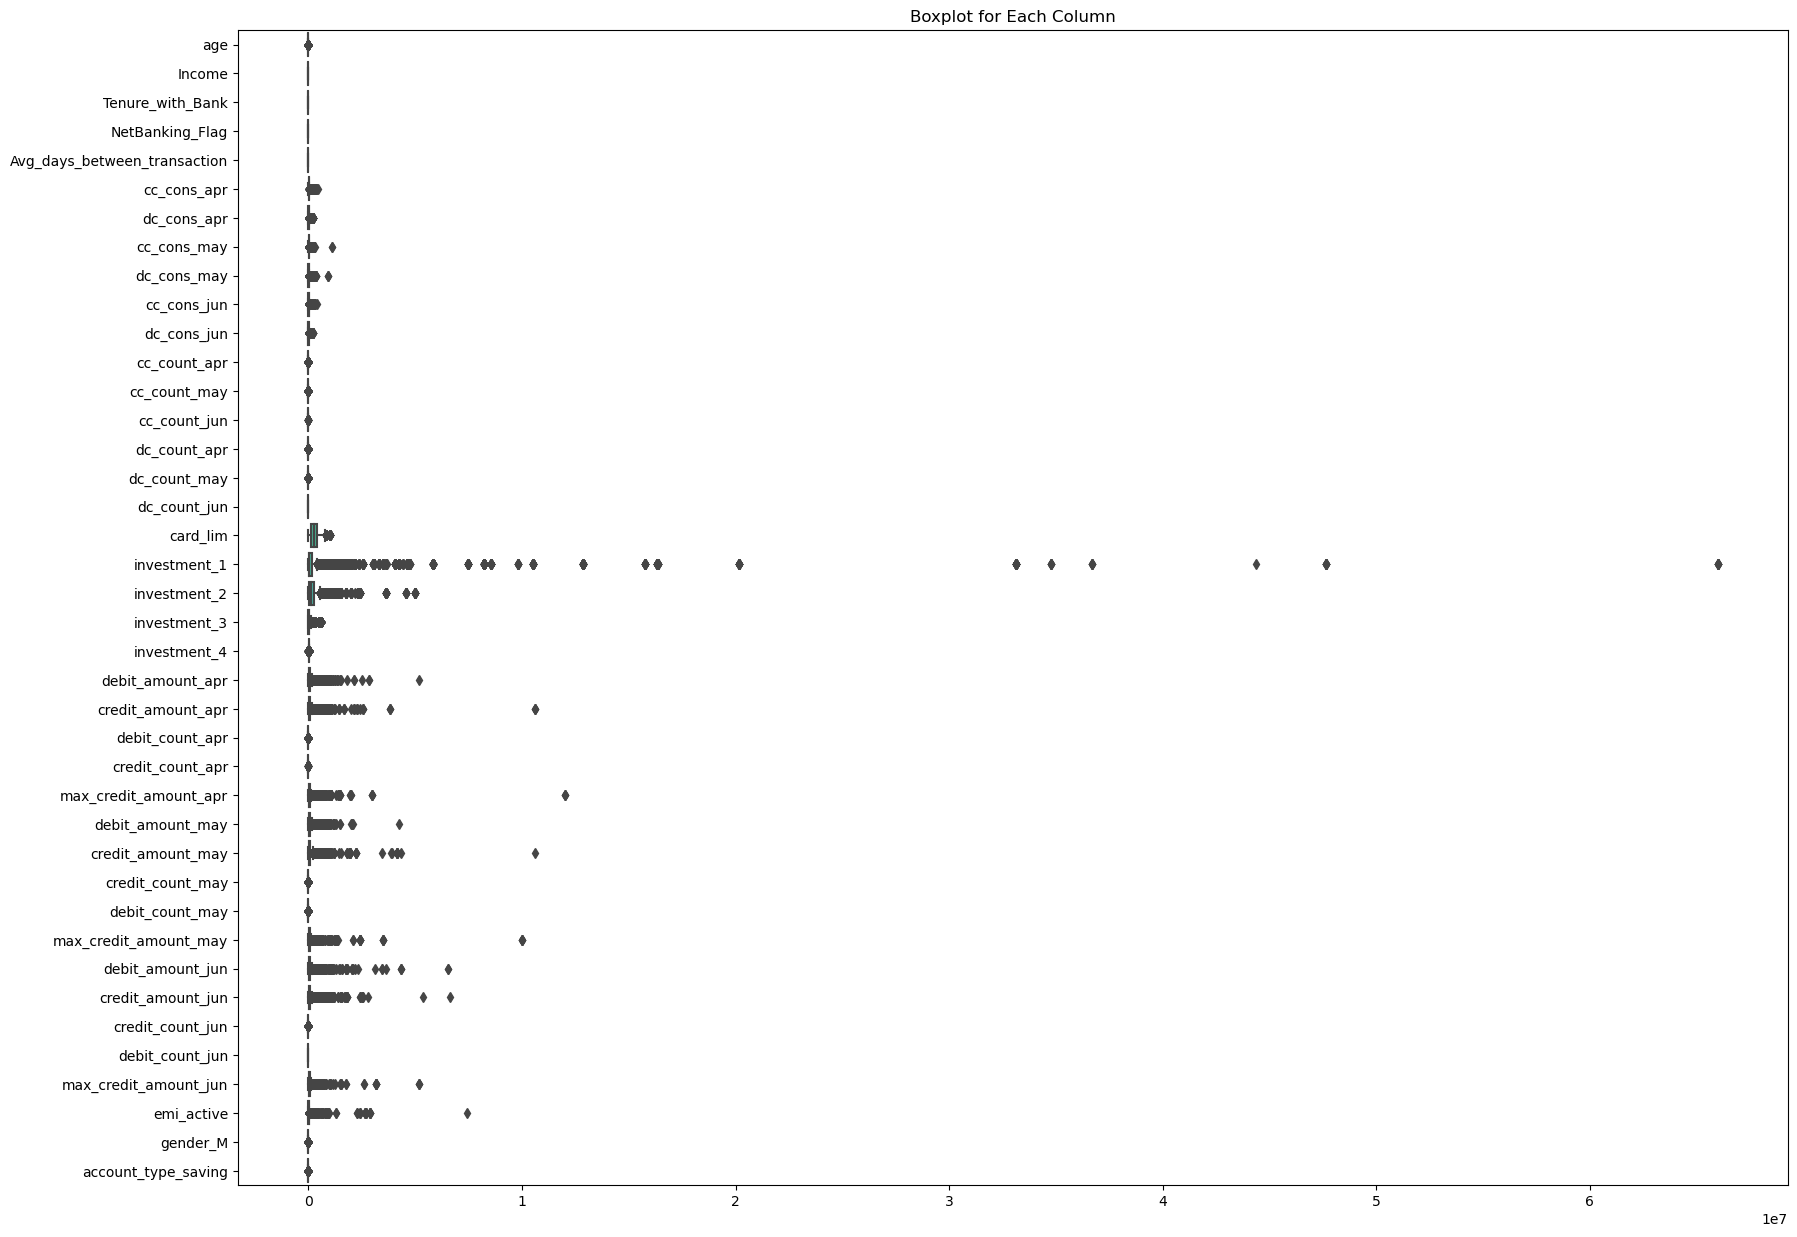

In [32]:
#boxplot
plt.figure(figsize=(20, 15))
sns.boxplot(data=x, orient='h')
plt.title('Boxplot for Each Column')
plt.show()

In [39]:
#creating a function to handling the outliers
def handle_outliers(df, multiplier=3):


    

    for column in df.columns:
        column_data = df[column]
        IQR = column_data.quantile(0.75) - column_data.quantile(0.25)
        lower_bound = column_data.quantile(0.25) - (IQR * multiplier)
        upper_bound = column_data.quantile(0.75) + (IQR * multiplier)

        df[column] = np.where(column_data > upper_bound, upper_bound,
                                     np.where(column_data < lower_bound, lower_bound,
                                              column_data))

    return df
x = handle_outliers(x,multiplier=1.5)

In [40]:
x.describe()

age        Income  Tenure_with_Bank  NetBanking_Flag  \
count  14995.000000  14995.000000      14995.000000     14995.000000   
mean      44.106169      0.800800          5.510770         0.719507   
std       14.117669      0.565208          2.865848         0.449255   
min       25.000000      0.000000          1.000000         0.000000   
25%       33.000000      0.000000          3.000000         0.000000   
50%       40.000000      1.000000          6.000000         1.000000   
75%       53.000000      1.000000          8.000000         1.000000   
max       83.000000      2.000000         10.000000         1.000000   

       Avg_days_between_transaction   cc_cons_apr   dc_cons_apr   cc_cons_may  \
count                  14995.000000  14995.000000  14995.000000  14995.000000   
mean                      11.048616  15132.372847   6411.071089  13313.918097   
std                        5.492216  13873.976363   6279.628032  12515.999217   
min                        2.000000    253.000000     19.350000    157.000000   
25%                        6.000000   4411.590000   1634.000000   3638.000000   
50%                       11.000000  10288.100000   3994.800000   8694.000000   
75%                       16.000000  21407.625000   9339.020000  18951.300000   
max                       20.000000  46901.677500  20896.550000  41921.250000   

        dc_cons_may   cc_cons_jun  ...  debit_count_may  \
count  14995.000000  14995.000000  ...     14995.000000   
mean    5774.904912  10006.509140  ...        40.385529   
std     5392.985820   9167.303229  ...        38.626651   
min       22.000000     65.000000  ...         0.000000   
25%     1643.500000   3004.500000  ...        11.000000   
50%     3821.000000   6655.250000  ...        23.000000   
75%     8212.000000  14247.000000  ...        69.000000   
max    18064.750000  31110.750000  ...       156.000000   

       max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
count           14995.000000      14995.000000       14995.000000   
mean            42066.995967      61642.203522       62391.889511   
std             31147.685597      48743.130945       50789.957133   
min                 0.250000          5.230000          11.880000   
25%             20083.000000      25726.925000       24920.080000   
50%             31408.000000      45801.490000       45901.000000   
75%             55986.000000      84438.580000       85596.155000   
max            109840.500000     172506.062500      176610.267500   

       credit_count_jun  debit_count_jun  max_credit_amount_jun    emi_active  \
count      14995.000000     14995.000000           14995.000000  14995.000000   
mean          15.610870        44.641080           39766.954521   6493.107278   
std           16.213241        35.088317           29527.075184   6545.624363   
min            1.000000         0.000000               0.060000      0.000000   
25%            4.000000        12.000000           19038.000000   1549.350000   
50%            7.000000        38.000000           30425.000000   3953.580000   
75%           21.000000        73.000000           53206.500000   9376.390000   
max           46.500000       133.000000          104459.250000  21116.950000   

       gender_M  account_type_saving  
count   14995.0              14995.0  
mean        1.0                  0.0  
std         0.0                  0.0  
min         1.0                  0.0  
25%         1.0                  0.0  
50%         1.0                  0.0  
75%         1.0                  0.0  
max         1.0                  0.0  

[8 rows x 40 columns]

In [87]:
#handling the skewness of data
from scipy.stats import boxcox,yeojohnson
for i in x:
    transformed_data, _ = yeojohnson(x[i] + 1)
    x[i] = transformed_data

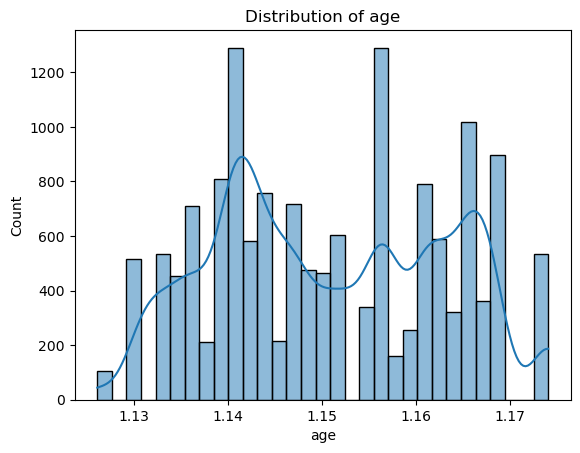

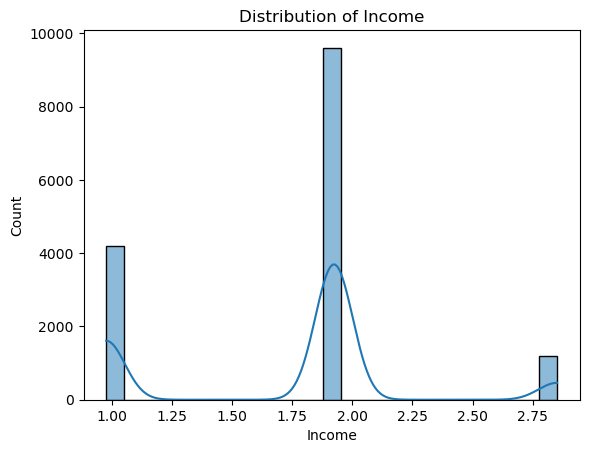

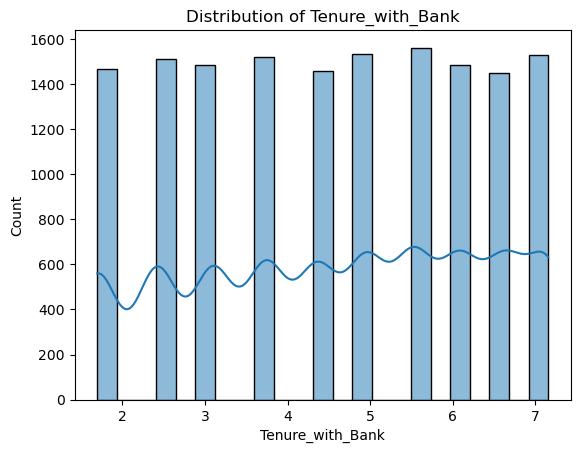

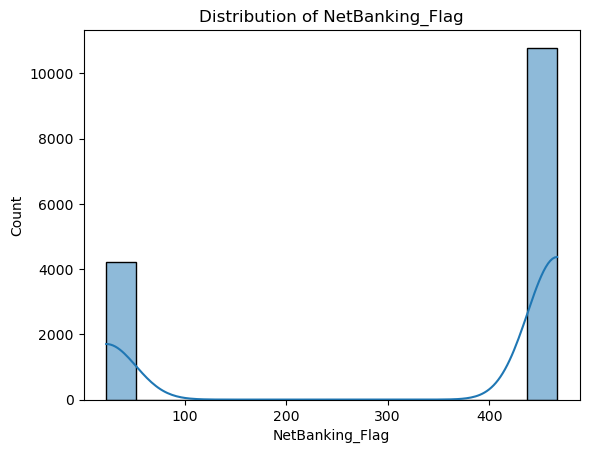

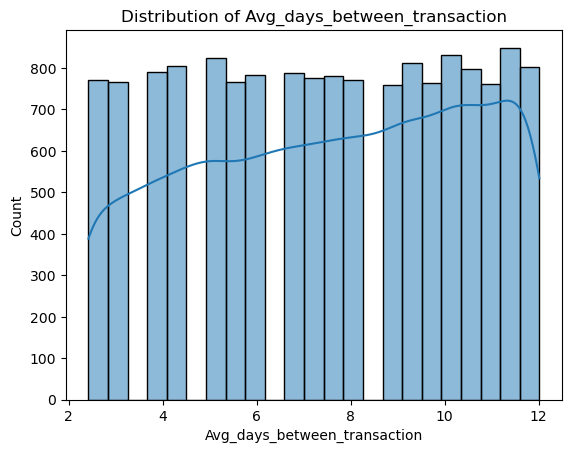

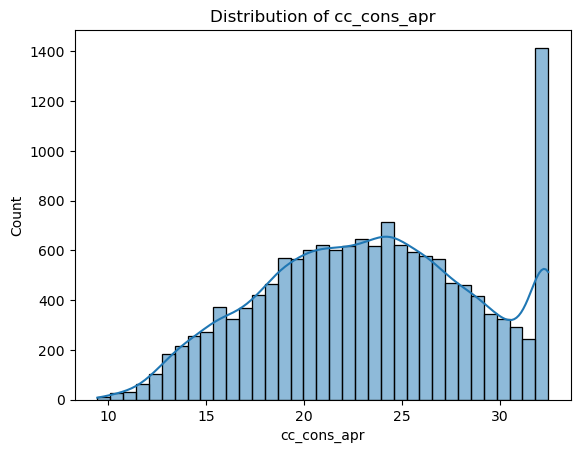

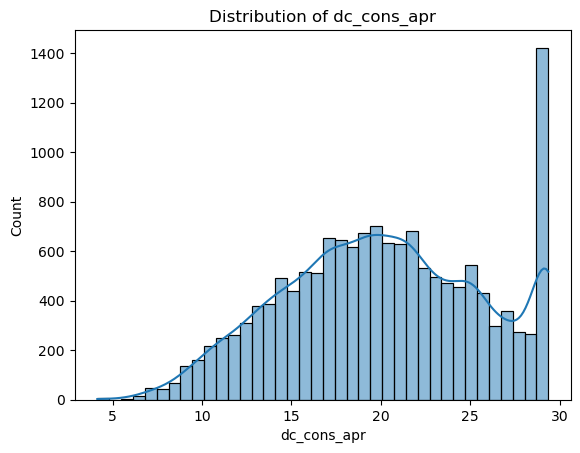

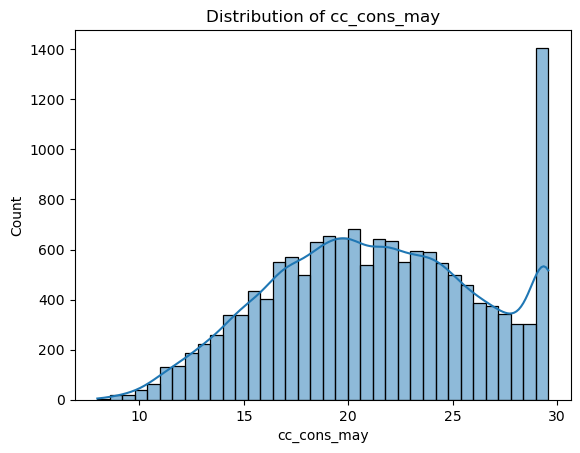

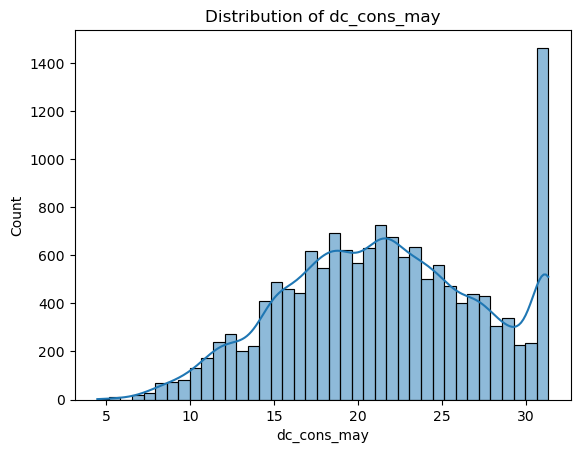

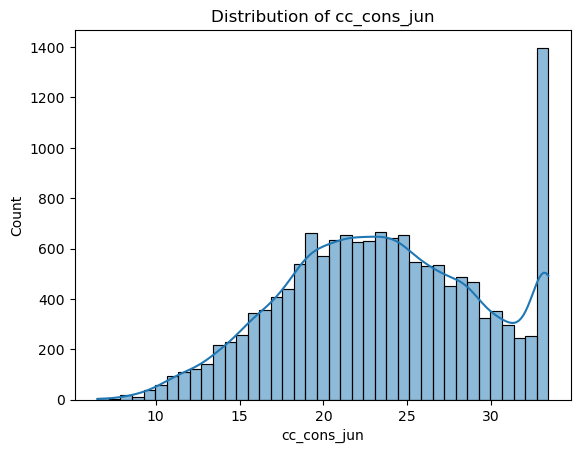

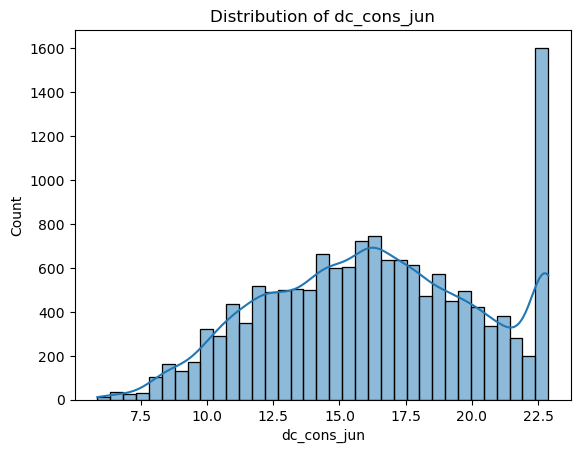

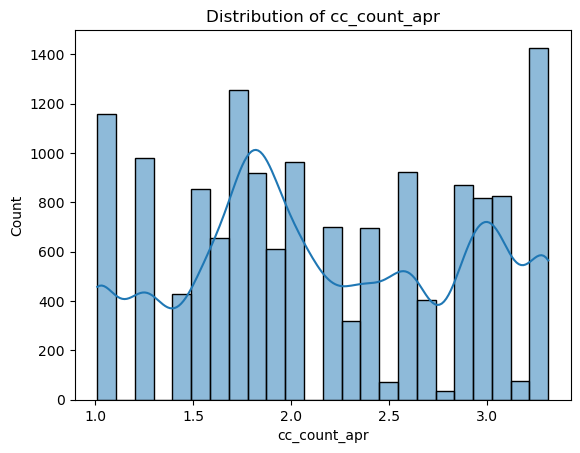

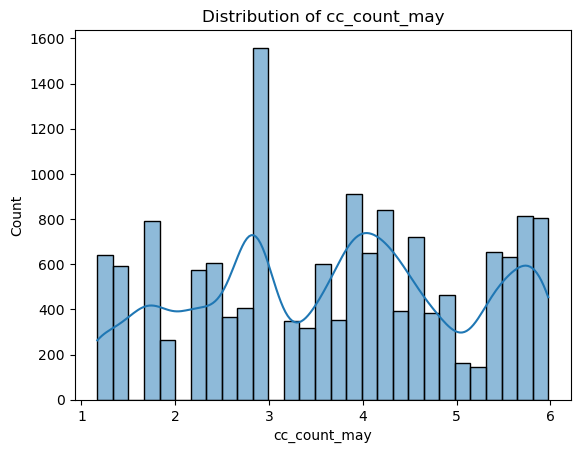

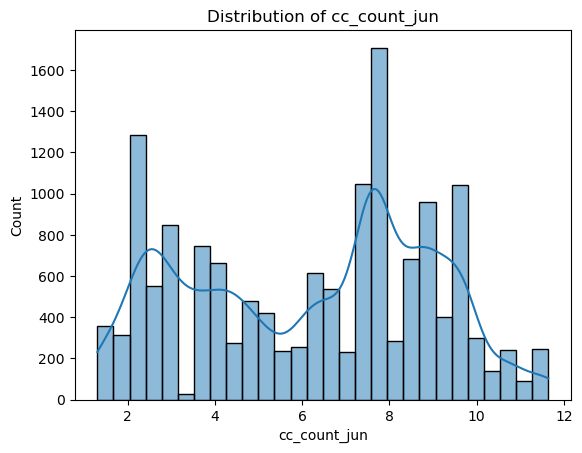

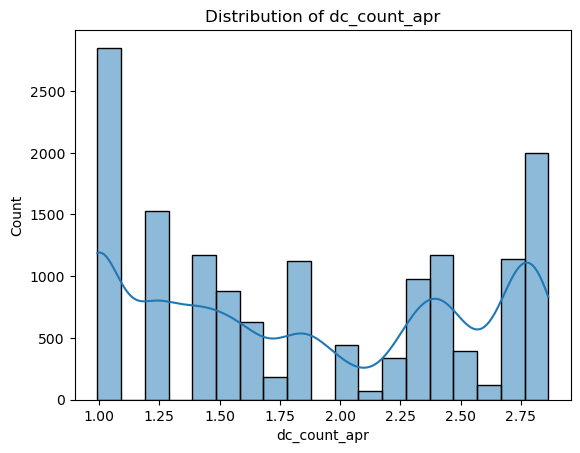

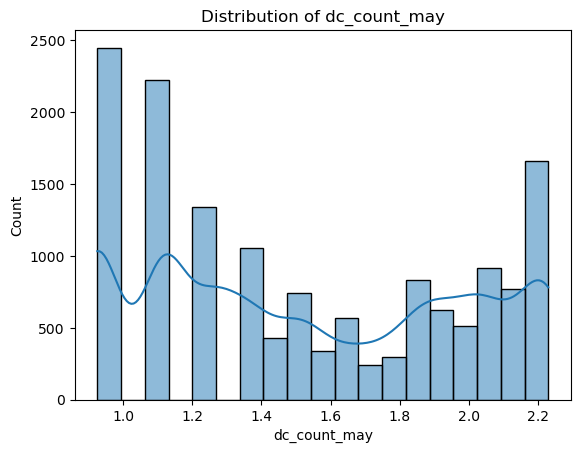

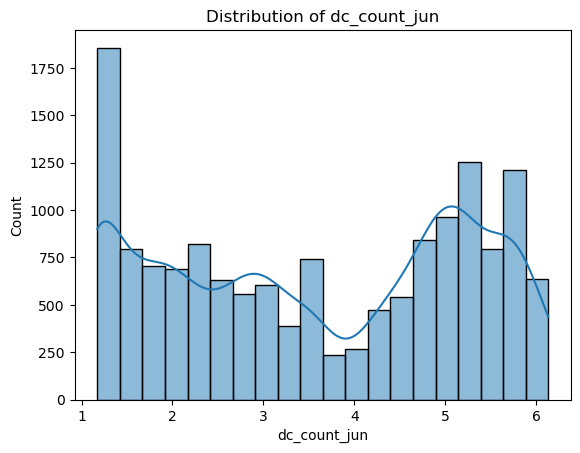

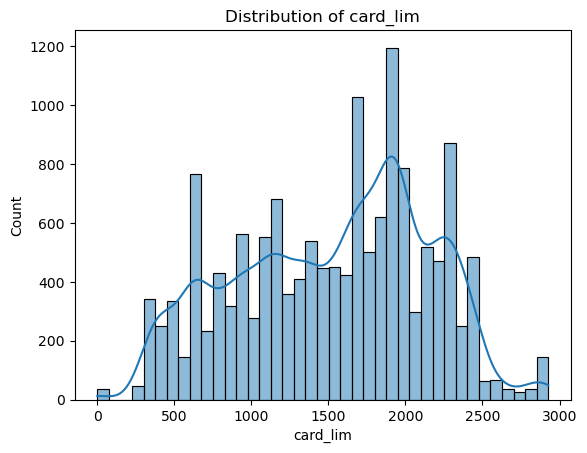

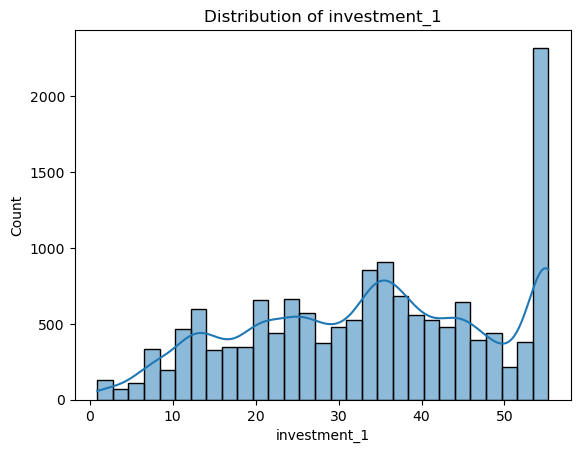

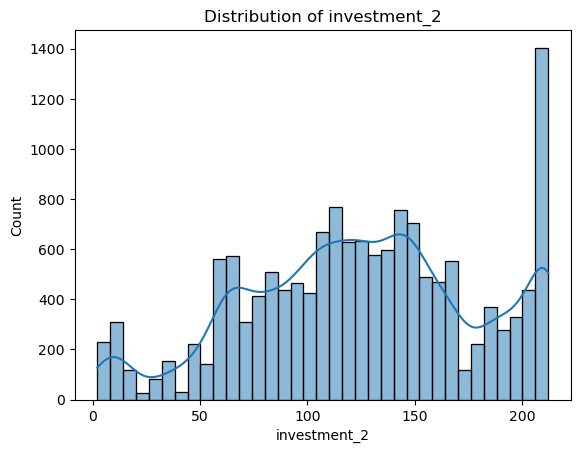

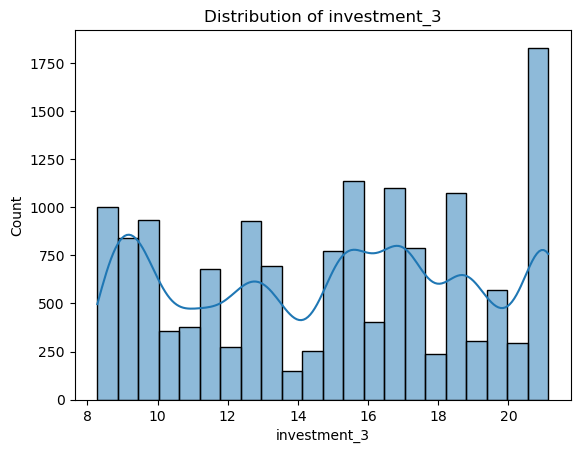

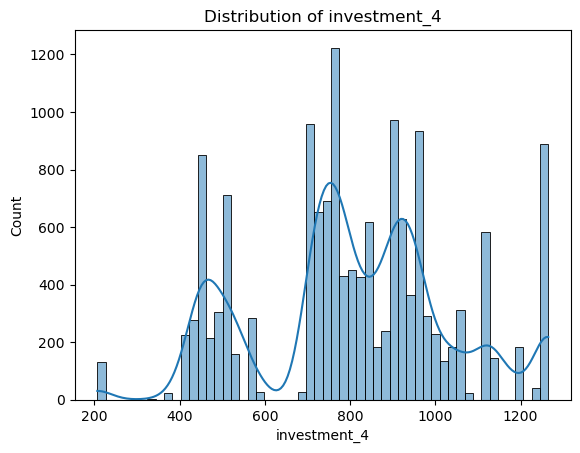

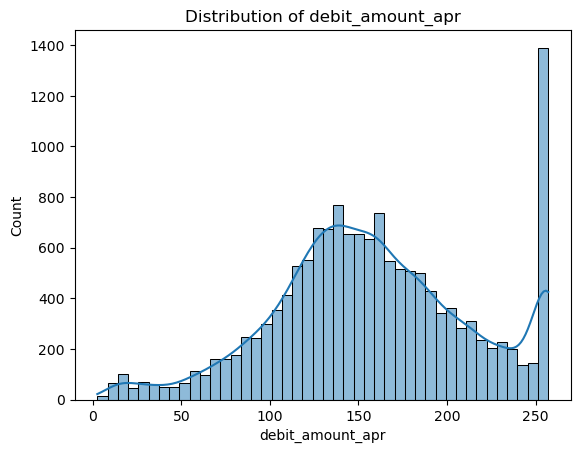

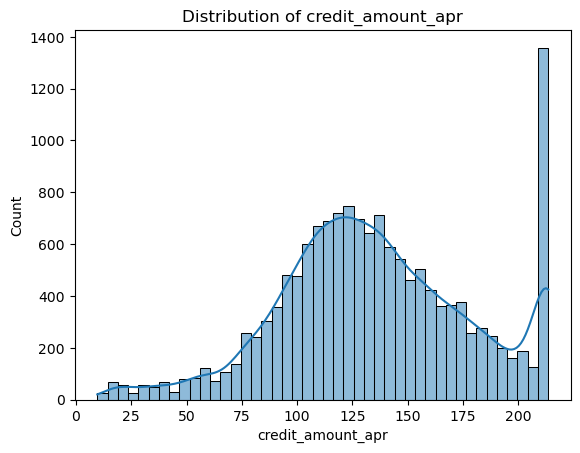

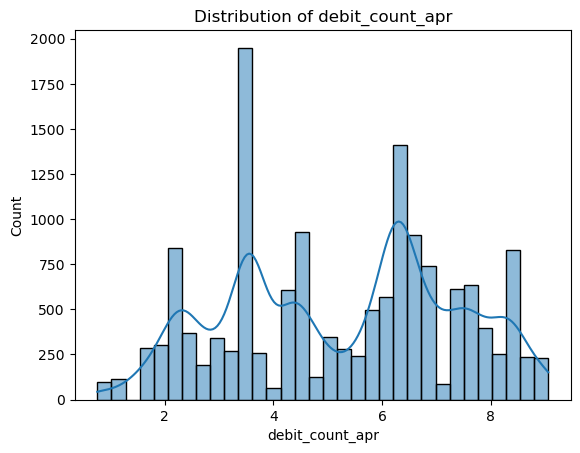

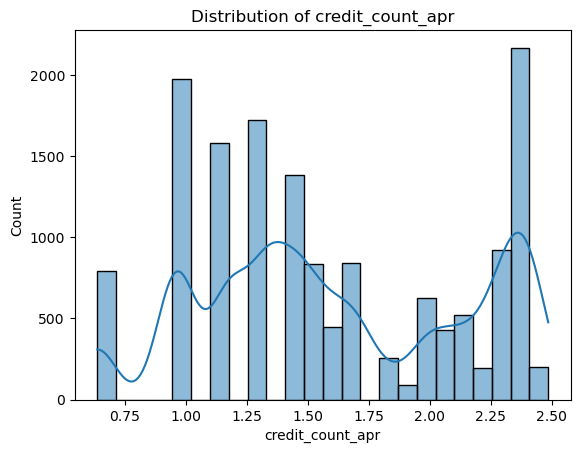

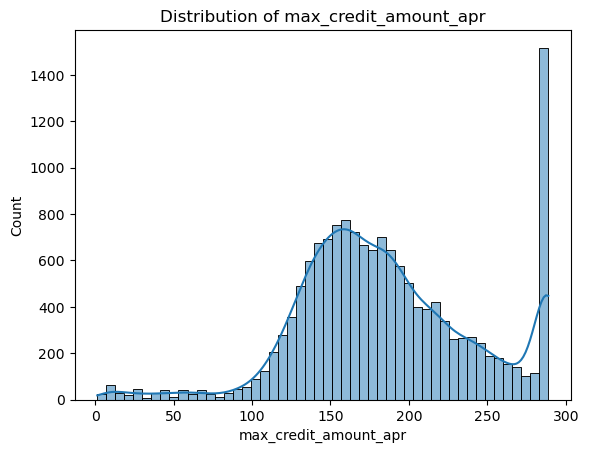

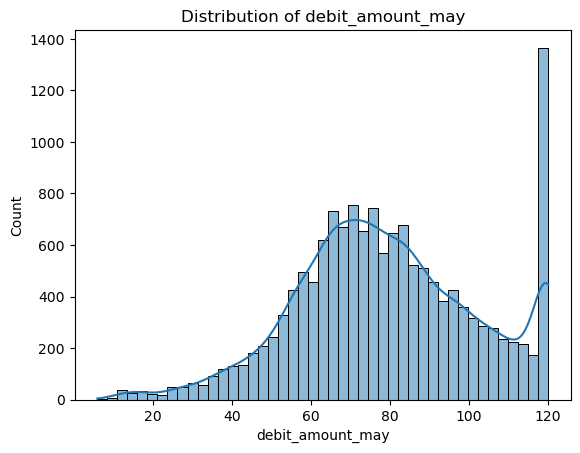

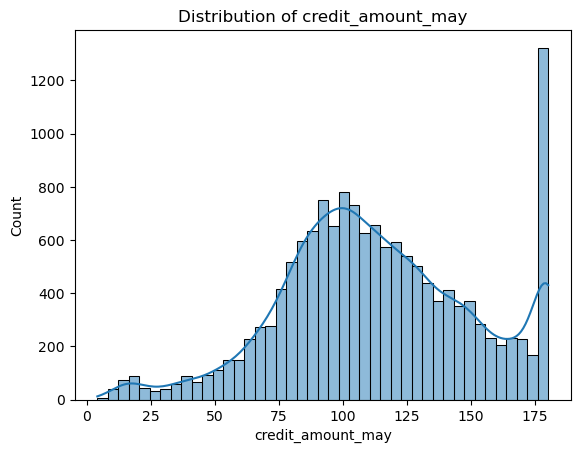

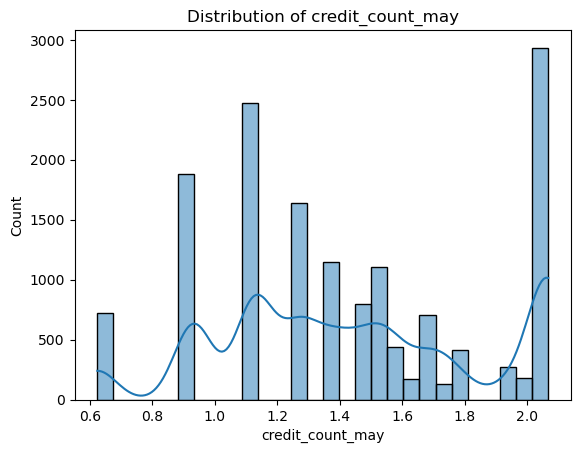

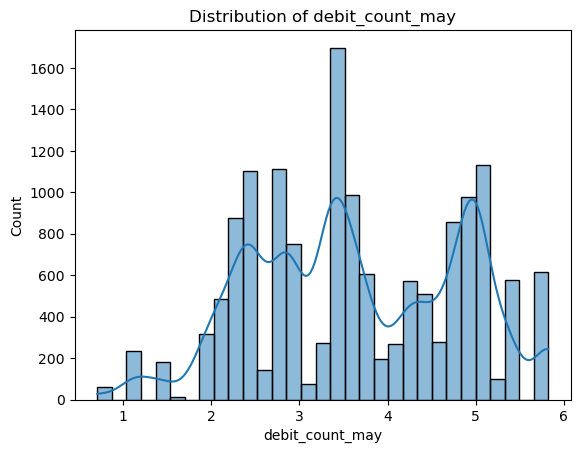

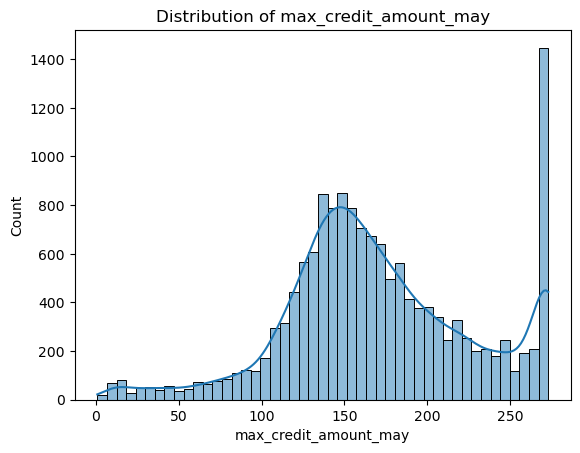

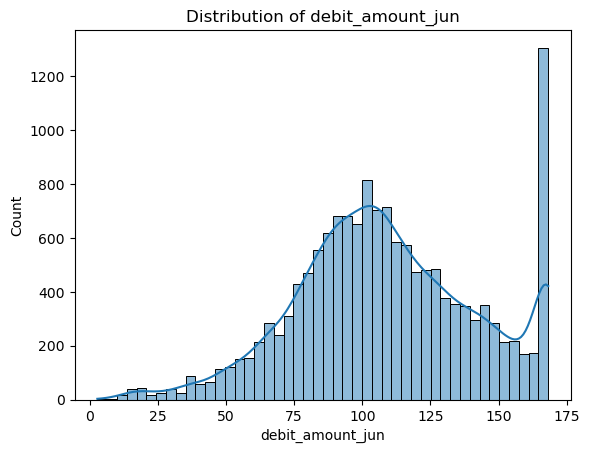

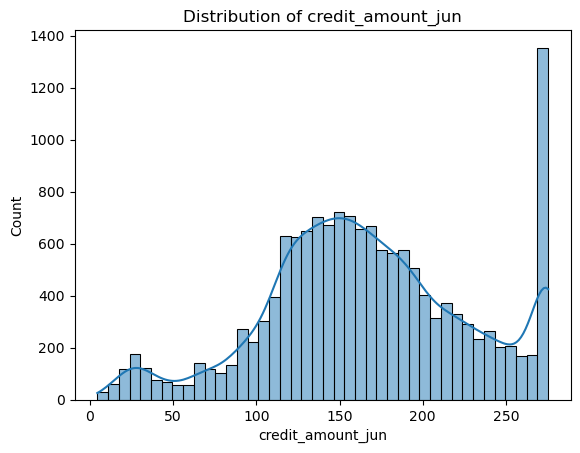

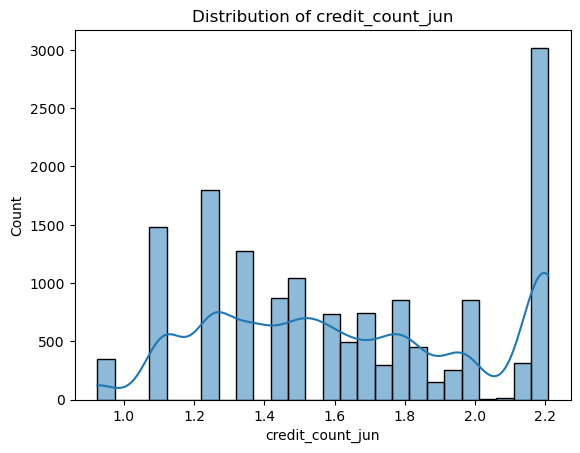

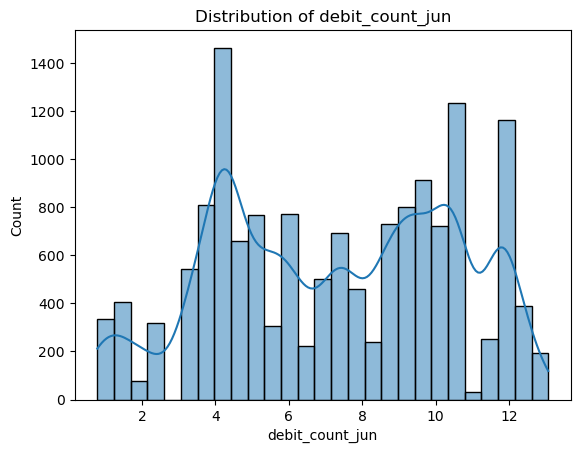

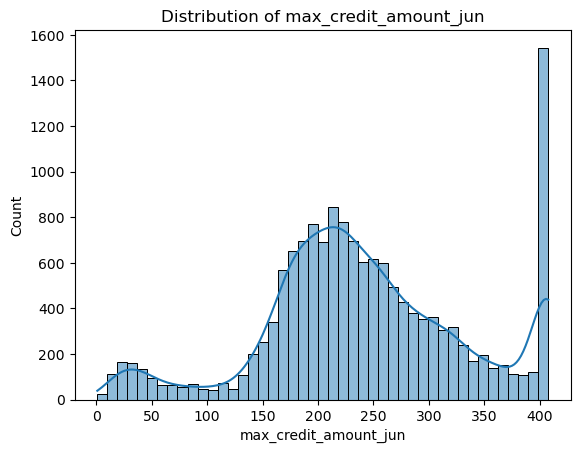

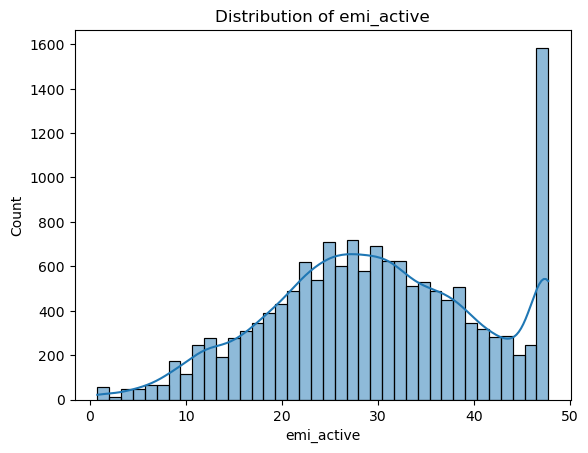

LinAlgError: singular matrix

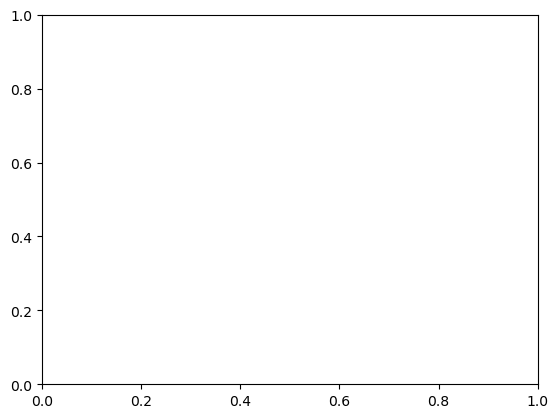

In [34]:
##distplot after transforming the features
for column in x.columns:
    sns.histplot(x[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

<AxesSubplot:xlabel='cc_cons', ylabel='Count'>

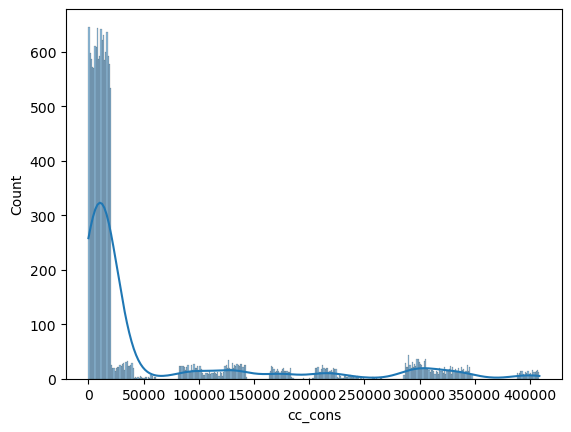

In [36]:
sns.histplot(y, kde=True)
  

In [88]:
#taking yeojohnson for cc_cons to remove its skewness
y, _ = yeojohnson(y + 1)
    

<AxesSubplot:ylabel='Count'>

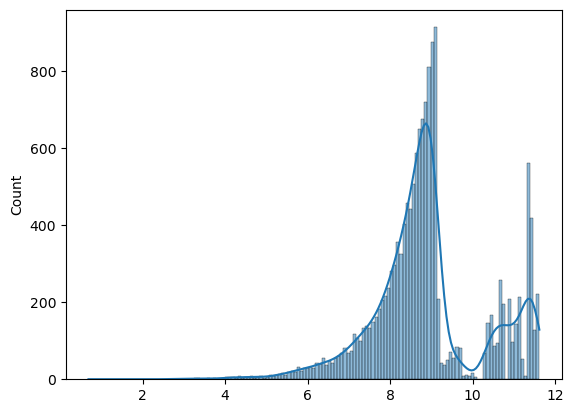

In [38]:
sns.histplot(y, kde=True)

# Model development


In [102]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 2199 to 5937
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           10496 non-null  float64
 1   Income                        10496 non-null  float64
 2   Tenure_with_Bank              10496 non-null  float64
 3   NetBanking_Flag               10496 non-null  float64
 4   Avg_days_between_transaction  10496 non-null  float64
 5   cc_cons_apr                   10496 non-null  float64
 6   dc_cons_apr                   10496 non-null  float64
 7   cc_cons_may                   10496 non-null  float64
 8   dc_cons_may                   10496 non-null  float64
 9   cc_cons_jun                   10496 non-null  float64
 10  dc_cons_jun                   10496 non-null  float64
 11  cc_count_apr                  10496 non-null  float64
 12  cc_count_may                  10496 non-null  float64
 13 

In [103]:
from statsmodels.api import OLS
from statsmodels.api import add_constant

model = OLS((y_train.astype(float)),add_constant(x_train.astype(float)))
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7602
Date:                Sat, 04 May 2024   Prob (F-statistic):              0.856
Time:                        14:36:31   Log-Likelihood:                -18158.
No. Observations:               10496   AIC:                         3.639e+04
Df Residuals:                   10457   BIC:                         3.668e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age             

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
#using grid search
param_grid = {'criterion':["squared_error", "absolute_error"],
             'max_depth' : [10,15],
             'min_samples_split': [10,20]}

dt = DecisionTreeRegressor()

grd = GridSearchCV(dt,param_grid=param_grid,cv=4)

grd.fit(x_train,y_train)

grd.best_params_

In [ ]:
#DecisionTree
dt = DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=20)

In [ ]:
dt.fit(x_train,y_train)

In [ ]:
#creating a function for predicting the values and error metrics
def model_build(model):
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)

    y_test_pred = model.predict(x_test)

    from sklearn import metrics
    from sklearn.model_selection import cross_val_score

    cv = cross_val_score(model,x,y,cv=5,scoring='neg_mean_squared_error')*-1

    print('train_rmse :',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    print('test_rmse :',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
    print('train_rmspe :',((metrics.mean_squared_error(y_train,y_train_pred) ** (1/2)/(np.mean(y_train)))*100))
    print('test_rmspe :',((metrics.mean_squared_error(y_test,y_test_pred) ** (1/2)/(np.mean(y_test)))*100))
    print('cv :',cv)

In [104]:
model_build(dt)

train_rmse : 1.2270394094841062
test_rmse : 1.5101908171367582
train_rmspe : 13.80454693836271
test_rmspe : 16.99277516217751
cv : [2.16952741 2.14665323 2.3101976  2.20836958 2.16412793]


In [106]:
#LinearRegression
lr = LinearRegression()

In [107]:
model_build(lr)

train_rmse : 1.3649121132402495
test_rmse : 1.374575899276095
train_rmspe : 15.355654584791822
test_rmspe : 15.466826400144523
cv : [1.89451057 1.88034582 1.9323743  1.89106875 1.80173086]


In [109]:
#KNN
knn = KNeighborsRegressor()

In [110]:
model_build(knn)

train_rmse : 1.2327027243906485
test_rmse : 1.49934487324888
train_rmspe : 13.868260862992859
test_rmspe : 16.870735825282498
cv : [2.24063977 2.24148425 2.34432234 2.29925505 2.17029379]


In [129]:
#RandomForest
rf = RandomForestRegressor()

In [130]:
model_build(rf)

train_rmse : 0.5174573569648903
test_rmse : 1.3887161982156986
train_rmspe : 5.821544375519475
test_rmspe : 15.625934055865953
cv : [1.92485901 1.90799257 1.96237319 1.91342058 1.83171315]


In [115]:
#SVM
svr = SVR()

In [116]:
model_build(svr)

train_rmse : 1.3697562297395482
test_rmse : 1.37816133636933
train_rmspe : 15.410152291281609
test_rmspe : 15.507169994935403
cv : [1.90147652 1.88906956 1.94733452 1.8967008  1.81090534]


Of all the models considered, linear regression demonstrates strong predictive performance on both the training and test sets. Therefore, it is a suitable choice for predicting missing target values.

In [117]:
#removing cc_cons from the dataset for prediction 
test = predict_data.drop('cc_cons',axis=1)

In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 19987
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            4993 non-null   int64  
 1   account_type                  4993 non-null   object 
 2   gender                        4993 non-null   object 
 3   age                           4993 non-null   int64  
 4   Income                        4993 non-null   object 
 5   Emp_Tenure_Years              4993 non-null   float64
 6   Tenure_with_Bank              4993 non-null   int64  
 7   region_code                   4993 non-null   float64
 8   NetBanking_Flag               4993 non-null   int64  
 9   Avg_days_between_transaction  4993 non-null   float64
 10  cc_cons_apr                   4993 non-null   float64
 11  dc_cons_apr                   4993 non-null   float64
 12  cc_cons_may                   4993 non-null   float64
 13  dc

In [119]:
#doing feature engineering on the dataset for prediction, just as I did with the feature engineering for my model-building dataset

#one-hot encoding
test = pd.get_dummies(test,columns=['gender','account_type','loan_enq'],drop_first=True)

#ordinal encoding
income_order = ['LOW','MEDIUM','HIGH']
encoder = OrdinalEncoder(categories=[income_order])
test['Income'] = encoder.fit_transform(test[['Income']])

#variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_thersh = VarianceThreshold(threshold=0)
var_thersh.fit(test)
var_thersh.get_support()
drop_columns = [i for i in test.columns
                 if i not in test.columns[var_thersh.get_support()]]
test = test.drop(drop_columns,axis=1)

def correlation(dataset,threshold):
    call_cor = set()
    corr_matritest = model_build_data.corr()
    for i in range(len(corr_matritest.columns)):
        for j in range(i):
            if (corr_matritest.iloc[i,j])>threshold:
                colname = corr_matritest.columns[i]
                call_cor.add(colname)
    return call_cor
corr_features = correlation(test,0.7)
len(set(corr_features))
test = test.drop(corr_features,axis = 1)

#dropping the unique feature id 
test = test.drop(['ID','region_code'],axis=1)

test['investment_4'] = test['investment_4'] - test['investment_4'].min()

def handle_outliers(df, multiplier=3):


    

    for column in df.columns:
        column_data = df[column]
        IQR = column_data.quantile(0.75) - column_data.quantile(0.25)
        lower_bound = column_data.quantile(0.25) - (IQR * multiplier)
        upper_bound = column_data.quantile(0.75) + (IQR * multiplier)

        df[column] = np.where(column_data > upper_bound, upper_bound,
                                     np.where(column_data < lower_bound, lower_bound,
                                              column_data))

    return df
test = handle_outliers(test,multiplier=1.5)


from scipy.stats import boxcox,yeojohnson
for i in test:
    transformed_data, _ = yeojohnson(test[i] + 1)
    test[i] = transformed_data

In [125]:
# Predicting values for customers where target variable having missing values
y_pred_dt = dt.predict(test)

In [126]:
#Transforming the values as normal
np.expm1(y_pred_dt)

array([6698.78258926, 8660.58871255, 4648.28166467, ..., 6698.78258926,
       5244.22730024, 5653.63498599])

In [127]:
#Final model
Final_model = pd.DataFrame({'ID': predict_data['ID'], 'cc_cons': np.expm1(y_pred_rf)} )

In [128]:
Final_model.head(40)

ID       cc_cons
0   19427   6698.782589
1   16150   8660.588713
2   11749   4648.281665
3   11635   6138.201702
4    8908   6698.782589
5    6324   8660.588713
6     538   4433.451632
7    7908   8660.588713
8   18674   6698.782589
9   19381   5575.194647
10   5598   6698.782589
11   4924   8459.480898
12   4154  11128.141773
13  13570   8459.480898
14   2203  11391.112622
15  15095  23156.624661
16  11974   7377.594211
17   6036   8459.480898
18  17416   6309.772308
19  11158  10512.420744
20   4426   6698.782589
21  19816   6044.409707
22   9506   8137.381968
23  10927   5606.263435
24  13046   8660.588713
25  11811   8137.381968
26  16016  10512.420744
27   5537   6698.782589
28  18898   6698.782589
29   7311   1799.443800
30   7138   8660.588713
31  15984  10512.420744
32  12054  14647.553019
33  14239   5606.263435
34  13501   7841.853839
35  14836    584.463230
36    975   7377.594211
37   8078   8459.480898
38   3778   8728.435863
39  16809   7377.594211